# 1. Import-Statements

In [1]:
pip install openai cairosvg lets-plot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.0/383.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00


In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

import pandas as pd
import csv
import cairosvg

# 2. Generierung der KI-Produktbeschreibungen

## Produkt 1: Laufschuh

In [3]:
from openai import OpenAI

client = OpenAI(api_key = 'sk-proj-****') # API-Key unkenntlich gemacht, da dies aus Sicherheitsgründen von OpenAI und GitHub gefordert wurde


def generate_product_description_1(specs_1):

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "Stellen Sie sich vor, Sie arbeiten als Marketing-Redakteur:in bei einem innovativen Unternehmen. Sie sind dafür verantwortlich, Produktbeschreibungen zu formulieren, um potentielle Käufer:innen zu begeistern und von Produkten zu überzeugen. Stellen Sie sich vor, dass diese Beschreibungen direkten Einfluss auf die Verkaufszahlen haben. Eine Produktbeschreibung ist ein informativer Text, der die Eigenschaften eines Produkts hervorhebt, um die Kaufentscheidung positiv zu beeinflussen."},
            {"role": "user",
             "content": [
                    {"type": "text", "text": specs_1},
                    {
                      "type": "image_url",
                      "image_url": {
                        "url": "https://m.media-amazon.com/images/I/61gZmytkO7L._AC_UY580_.jpg",
                      },
                  }
              ]
          }
        ]
    )
    return response.choices[0].message.content


specs_1 = "Bitte erstellen Sie eine Produktbeschreibung (mind. 250 Zeichen) zu diesem Produkt in einem für Kund:innen ansprechenden Stil." \
        "Nutzen Sie hierfür bitte die untenstehenden Produktmerkmale und das Produktbild." \
        "Seien Sie überzeugend und kreativ!" \
        "Produktmerkmale: " \
        "- Modell: Nike Free 5.0 Laufschuh" \
        "- Farbe: Rot" \
        "- Geringes Gewicht (186 g)" \
        "- Sohlendämpfung" \
        "- Adaptive Passform" \
        "- Zusätzlicher Halt" \
        "- Obermaterial: Synthetik, Textil" \

#description_1 = generate_product_description_1(specs_1) # generates single description
#print(description_1)



In [4]:
import csv

prod_1 = []
with open('/content/drive/MyDrive/Bachelorarbeit/Beschreibungen/prod_1.csv', newline='', encoding='utf-8') as csvfile:
    # Create a CSV reader object
    csvreader = csv.reader(csvfile)

    # Skip the header if needed
    next(csvreader)

    # Loop through the rows and concatenate them into strings
    for row in csvreader:
        # Join the row into a single string, separated by a space (or any delimiter you prefer)
        row_as_string = ' '.join(row)  # You can change the delimiter (e.g., ', '.join(row)) if needed
        # Append the concatenated string to the prod_1 list
        prod_1.append(row_as_string)
prod_1 = [s.replace("\n", "") for s in prod_1]
# Now 'data' contains all rows from the CSV file as a list of lists
#for i in range(250):
#  prod_1.append(generate_product_description_1(specs_1))

In [5]:
#import csv
#with open('prod_1.csv', 'w', newline='') as csvfile:
#    writer = csv.writer(csvfile)
#    writer.writerow(['Description'])  # Write the header
#    for description in prod_1:
#        writer.writerow([description])

In [6]:
print(prod_1)

['**Entfesseln Sie Ihre Laufleidenschaft mit dem Nike Free 5.0 Laufschuh!**Erleben Sie, wie jede Laufeinheit zum Genuss wird – mit dem leichten Nike Free 5.0! Dieser stilvolle Laufschuh in leuchtendem Rot überzeugt nicht nur durch sein auffälliges Design, sondern auch durch herausragende Funktionen. Mit einem Gewicht von nur 186 g spüren Sie beim Laufen beinahe das Gefühl, barfuß unterwegs zu sein. Die innovative Sohlendämpfung sorgt für ein weiches Laufgefühl und schockabsorbierende Eigenschaften, während die adaptive Passform sich perfekt an Ihren Fuß anpasst für optimalen Halt. Das Obermaterial aus Synthetik und Textil schenkt Ihnen nicht nur Atmungsaktivität, sondern auch Unterstützung, damit Sie jede Runde mit Leichtigkeit meistern können. Egal ob auf der Strecke oder im Alltag – der Nike Free 5.0 ist Ihr idealer Begleiter für jede Herausforderung. Holen Sie sich den Komfort und die Performance, die Sie verdienen, und heben Sie Ihr Lauftraining auf das nächste Level!', '### Nike F

## Produkt 2: Ecksofa

In [7]:
from openai import OpenAI

client = OpenAI(api_key = 'sk-proj-****') # API-Key unkenntlich gemacht, da dies aus Sicherheitsgründen von OpenAI und GitHub gefordert wurde


def generate_product_description_2(specs_2):

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "Stellen Sie sich vor, Sie arbeiten als Marketing-Redakteur:in bei einem innovativen Unternehmen. Sie sind dafür verantwortlich, Produktbeschreibungen zu formulieren, um potentielle Käufer:innen zu begeistern und von Produkten zu überzeugen. Stellen Sie sich vor, dass diese Beschreibungen direkten Einfluss auf die Verkaufszahlen haben. Eine Produktbeschreibung ist ein informativer Text, der die Eigenschaften eines Produkts hervorhebt, um die Kaufentscheidung positiv zu beeinflussen."},
            {"role": "user",
             "content": [
                    {"type": "text", "text": specs_2},
                    {
                      "type": "image_url",
                      "image_url": {
                        "url": "https://m.media-amazon.com/images/I/71DY5IrXRyL._AC_SX679_.jpg",
                      },
                  }
              ]
          }
        ]
    )
    return response.choices[0].message.content


specs_2 = "Bitte erstellen Sie eine Produktbeschreibung (mind. 250 Zeichen) zu diesem Produkt in einem für Kund:innen ansprechenden Stil." \
        "Nutzen Sie hierfür bitte die untenstehenden Produktmerkmale und das Produktbild." \
        "Seien Sie überzeugend und kreativ!" \
        "Produktmerkmale:" \
        "- Multifunktional: Umbau von Liege- in Schlafsofa möglich" \
        "- Farbe: Dunkelblau" \
        "- Anzahl Sitze: 3" \
        "- Hohe Rückenlehne" \
        "- Großer Stauraum" \
        "- Getränkehalter an Armstütze" \
        "- Material: Baumwolle, Leinen" \
        "- Füllung: Schwamm"

#description_2 = generate_product_description_2(specs_2)
#print(description_2)



In [8]:
import csv

prod_2 = []
with open('/content/drive/MyDrive/Bachelorarbeit/Beschreibungen/prod_2.csv', newline='', encoding='utf-8') as csvfile:
    # Create a CSV reader object
    csvreader = csv.reader(csvfile)

    # Skip the header if needed
    next(csvreader)

    # Loop through the rows and concatenate them into strings
    for row in csvreader:
        # Join the row into a single string, separated by a space (or any delimiter you prefer)
        row_as_string = ' '.join(row)  # You can change the delimiter (e.g., ', '.join(row)) if needed
        # Append the concatenated string to the prod_1 list
        prod_2.append(row_as_string)
prod_2 = [s.replace("\n", "") for s in prod_2]

#for i in range(250):
#  prod_2.append(generate_product_description_2(specs_2))

In [9]:
#with open('prod_2.csv', 'w', newline='') as csvfile:
#    writer = csv.writer(csvfile)
#    writer.writerow(['Description'])  # Write the header
#    for description in prod_2:
#        writer.writerow([description])

## Produkt 3: Parfüm

In [10]:
from openai import OpenAI

client = OpenAI(api_key = 'sk-proj-****') # API-Key unkenntlich gemacht, da dies aus Sicherheitsgründen von OpenAI und GitHub gefordert wurde


def generate_product_description_3(specs_3):

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "Stellen Sie sich vor, Sie arbeiten als Marketing-Redakteur:in bei einem innovativen Unternehmen. Sie sind dafür verantwortlich, Produktbeschreibungen zu formulieren, um potentielle Käufer:innen zu begeistern und von Produkten zu überzeugen. Stellen Sie sich vor, dass diese Beschreibungen direkten Einfluss auf die Verkaufszahlen haben. Eine Produktbeschreibung ist ein informativer Text, der die Eigenschaften eines Produkts hervorhebt, um die Kaufentscheidung positiv zu beeinflussen."},
            {"role": "user",
             "content": [
                    {"type": "text", "text": specs_3},
                    {
                      "type": "image_url",
                      "image_url": {
                        "url": "https://media.douglas.de/medias/yzPe8T1117098-0-dgl-DE.jpg?context=bWFzdGVyfGltYWdlc3wxNzYxNTB8aW1hZ2UvanBlZ3xhRGswTDJneVlTOHpORE01TWpFMk9EYzFPVE15Tmk5NWVsQmxPRlF4TVRFM01EazRYekJmWkdkc0xVUkZMbXB3Wnd8YTgwMjJiZGZlMDUzM2ZlZmY2ZmEzNDUxMjc0NDA3NDViZGE3MzdmMWU0M2E5NWNhOWVmYjk5NmRjMDU1OWFlMw&grid=true&imPolicy=grayScaled&imdensity=1&imwidth=775",
                      },
                  }
              ]
          }
        ]
    )
    return response.choices[0].message.content


specs_3 = "Bitte erstellen Sie eine Produktbeschreibung (mind. 250 Zeichen) zu diesem Produkt in einem für Kund:innen ansprechenden Stil." \
        "Nutzen Sie hierfür bitte die untenstehenden Produktmerkmale und das Produktbild." \
        "Seien Sie überzeugend und kreativ!" \
        "Produktmerkmale:" \
        "- Name: Prada Paradoxe Intense" \
        "- Produktart: Eau de Parfum" \
        "- recycelbare Verpackung" \
        "- nachfüllbarer Flakon" \
        "- Duftrichtung: blumig" \
        "- Kopfnote: Jasmin, Bergamotte, Birne" \
        "- Herznote: Neroli, Jasmin, Moos" \
        "- Basisnote: Moos, Amber, Vanille, Moschus"

#description_3 = generate_product_description_3(specs_3) # generates single description
#print(description_3)



In [11]:
import csv

prod_3 = []
with open('/content/drive/MyDrive/Bachelorarbeit/Beschreibungen/prod_3.csv', newline='', encoding='utf-8') as csvfile:
    # Create a CSV reader object
    csvreader = csv.reader(csvfile)

    # Skip the header if needed
    next(csvreader)

    # Loop through the rows and concatenate them into strings
    for row in csvreader:
        # Join the row into a single string, separated by a space (or any delimiter you prefer)
        row_as_string = ' '.join(row)  # You can change the delimiter (e.g., ', '.join(row)) if needed
        # Append the concatenated string to the prod_1 list
        prod_3.append(row_as_string)
prod_3 = [s.replace("\n", "") for s in prod_3]

#for i in range(250):
#  prod_3.append(generate_product_description_3(specs_3))

In [12]:
#with open('prod_3.csv', 'w', newline='') as csvfile:
#    writer = csv.writer(csvfile)
#    writer.writerow(['Description'])  # Write the header
#    for description in prod_3:
#        writer.writerow([description])

## Produkt 4: Trainingsjacke

In [13]:
from openai import OpenAI

client = OpenAI(api_key = 'sk-proj-****') # API-Key unkenntlich gemacht, da dies aus Sicherheitsgründen von OpenAI und GitHub gefordert wurde


def generate_product_description_4(specs_4):

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "Stellen Sie sich vor, Sie arbeiten als Marketing-Redakteur:in bei einem innovativen Unternehmen. Sie sind dafür verantwortlich, Produktbeschreibungen zu formulieren, um potentielle Käufer:innen zu begeistern und von Produkten zu überzeugen. Stellen Sie sich vor, dass diese Beschreibungen direkten Einfluss auf die Verkaufszahlen haben. Eine Produktbeschreibung ist ein informativer Text, der die Eigenschaften eines Produkts hervorhebt, um die Kaufentscheidung positiv zu beeinflussen."},
            {"role": "user",
             "content": [
                    {"type": "text", "text": specs_4},
                    {
                      "type": "image_url",
                      "image_url": {
                        "url": "https://img01.ztat.net/article/spp-media-p1/370accb533e44cb5b729a3abd7dccf2c/42f4b3553fb341fd81c27eca5c1ca2af.jpg?imwidth=1800",
                      },
                  }
              ]
          }
        ]
    )
    return response.choices[0].message.content


specs_4 = "Bitte erstellen Sie eine Produktbeschreibung (mind. 250 Zeichen) zu diesem Produkt in einem für Kund:innen ansprechenden Stil." \
        "Nutzen Sie hierfür bitte die untenstehenden Produktmerkmale und das Produktbild." \
        "Seien Sie überzeugend und kreativ!" \
        "Produktmerkmale:" \
        "- Name: adidas Originals ADICOLOR CLASSICS FIREBIRD TRACK - Bomberjacke - black white" \
        "- Material: 100% Polyester" \
        "- Fütterungsdicke: ungefüttert" \
        "- Stehkragen" \
        "- Mit Reißverschluss verschließbare Taschen" \
        "- Muster: Gestreift" \
        "- Ärmellänge: Langarm"

#description_4 = generate_product_description_4(specs_4) # generates single description
#print(description_4)



In [14]:
import csv

prod_4 = []
with open('/content/drive/MyDrive/Bachelorarbeit/Beschreibungen/prod_4.csv', newline='', encoding='utf-8') as csvfile:

    csvreader = csv.reader(csvfile)
    next(csvreader)

    for row in csvreader:
        row_as_string = ' '.join(row)
        prod_4.append(row_as_string)
prod_4 = [s.replace("\n", "") for s in prod_4]

#prod_4 = []
#for i in range(250):
#  prod_4.append(generate_product_description_4(specs_4))

In [15]:
#with open('prod_4.csv', 'w', newline='') as csvfile:
#    writer = csv.writer(csvfile)
#    writer.writerow(['Description'])  # Write the header
#    for description in prod_4:
#        writer.writerow([description])

# 3. Menschlich generierte Produktbeschreibungen ohne KI-Vorschlag (Umfrage)

## Produkt 1: Laufschuh

In [16]:
import pandas as pd

prod_1_ohne_KI = pd.read_excel("/content/drive/MyDrive/Bachelorarbeit/Beschreibungen/Prod_1_ohne_KI.xlsx", header=None, engine='openpyxl')[0].tolist()
prod_1_ohne_KI = [s.replace("\n", "") for s in prod_1_ohne_KI]

print(prod_1_ohne_KI)

['Der Schuh von Nike ist superleicht mit einem Gewicht von 186g, bietet zusätzlichen Halt für Ihre Füße, hat eine adaptive Passform und lässt die Füße "atmen" durch das qualitative Textil. In der Farbe rot lässt sich gut tragen für Frauen und auch für Männer, ist definitv ein Hingucker und eine kleine Spa Oase für Ihre Füße. Nike Free 5.0 Laufschuh, definitiv ein Schuh für jedermann, der seine Füße respektiert. 😉', 'Das Modell Nike Free 5.0 liegt wunderschön am Fuß.Die Farbe rot ist perfekt zu sportlichen Outfits.Durch das geringe Gewicht hat es eine adaptive Passform mit zusätzlichem Halt und perfekter Sohlendämpfung.Obermaterial aus bequemen synthetischen Textil.', 'Der neue Nike Free 5.0 überzeugt mit seinem geringen Gewicht von lediglich 186g. Trotz dieser Leichtigkeit wurde Sohlendämpfung nicht vernachlässigt und unterstützt den Fuß bei Belastung. Zudem sorgt die adaptive Passform für zusätzlichen Halt und beugt so Verletzung und Ermüdung der Füße vor. Das Obermaterial ist pflegel

## Produkt 2: Ecksofa

In [17]:
import pandas as pd

prod_2_ohne_KI = pd.read_excel("/content/drive/MyDrive/Bachelorarbeit/Beschreibungen/Prod_2_ohne_KI.xlsx", header=None, engine='openpyxl')[0].tolist()
prod_2_ohne_KI = [s.replace("\n", "") for s in prod_2_ohne_KI]

print(prod_2_ohne_KI)

['Das Ecksofa ist mit Baumwolle und Leinen überzogen, was es zu einem Hingucker macht, und durch den Umbau in Schlafsofa mit großem Stauraum ist es auch sehr nützlich. Die Rückenlehne und Getränkehalter machen es zu einem sehr entspannten Örtchen für Kinoabende mit Freunden und Familie. In der Farbe dunkelblau passt es sich jeder Einrichtung an. ', 'Das Multifunktionsschlafsofa glänzt mit seinem wunderschönen Design. Der Umbau lässt sich leicht von Liege- in Schlafstellung umfunktionieren.Die Farbe dunkelblau verleiht dem Raum eine besondere Atmosphäre.Das Schlafsofa hat 3 Sitzfelder, die eine Füllung von Schwamm enthalten. Die hohe Rückenlehne für entspannte Abende, mit Getränkehalter an den Armstützen.Der große Stauraum ermöglicht die Lagerung von Bettwäsche und vielem mehr.', 'Die Wohnungen heutzutage sind meist platzsparend gebaut. Dennoch möchte man die Möglichkeit haben, Freunde über Nacht zu beherbergen. Es gibt 3 Sitzplätze und im unteren Bereich ist Stauraum für Bettzeug. Der 

# 4. Menschlich generierte Produktbeschreibungen mit KI-Vorschlag (Umfrage)

## Produkt 1: Laufschuh

In [18]:
import pandas as pd

prod_1_mit_KI = pd.read_excel("/content/drive/MyDrive/Bachelorarbeit/Beschreibungen/Prod_1_mit_KI.xlsx", header=None, engine='openpyxl')[0].tolist()
prod_1_mit_KI = [s.replace("\n", "") for s in prod_1_mit_KI]

print(prod_1_mit_KI)

['Entdecken Sie den Nike Free 5.0 Laufschuh in einem kraftvollen Rot – Ihr perfekter Begleiter für unbeschwerte Läufe! Mit einem Gewicht von nur 186 Gramm spüren Sie kaum, dass Sie ihn tragen, während die innovative Sohlendämpfung für ein sanftes Laufgefühl sorgt. Die adaptive Passform passt sich Ihrem Fuß an und bietet Ihnen zusammen mit zusätzlichem Halt optimalen Komfort und Stabilität, egal auf welchem Untergrund Sie unterwegs sind. Das hochwertige Obermaterial aus Synthetik und Textil garantiert Atmungsaktivität und Robustheit – so sind Sie jederzeit bereit, Ihre Grenzen zu überschreiten. Starten Sie durch mit Stil und Leichtigkeit.', 'Der Nike Free 5.0 Laufschuh ist nicht nur wegen seiner roten Farbe und dem chicen Design aus atmungsaktivem Synthetik und Textil ein absoluter Hingucker. Auch sein extrem geringes Gewicht von nur 186g überzeugt beim nächsten Lauf garantiert. Die innovative Sohlendämpfung sorgt dabei für eine optimale Schonung der Gelenke, während die adaptive Passfo

## Produkt 2: Ecksofa

In [19]:
import pandas as pd

prod_2_mit_KI = pd.read_excel("/content/drive/MyDrive/Bachelorarbeit/Beschreibungen/Prod_2_mit_KI.xlsx", header=None, engine='openpyxl')[0].tolist()
prod_2_mit_KI = [s.replace("\n", "") for s in prod_2_mit_KI]

print(prod_2_mit_KI)

['Verwandeln Sie Ihr Wohnzimmer in eine Oase der Entspannung mit unserem eleganten dunkelblauen Sofa, das sich im Handumdrehen in ein gemütliches Schlafsofa verwandeln lässt. Ob Sie es sich mit einem guten Buch bequem machen oder Übernachtungsgäste willkommen heißen – dieses Sofa bietet Platz für bis zu drei Personen und überzeugt mit seiner hohen Rückenlehne für extra Komfort. Die praktischen Getränkehalter an den Armstützen sorgen dafür, dass Ihre Lieblingsgetränke stets griffbereit sind. Mit einem großen Stauraum für Kissen und Decken wird es zum idealen Allrounder. Gefertigt aus hochwertiger Baumwolle und Leinen, und gefüllt mit weichem Schwamm, verspricht es langanhaltende Gemütlichkeit. Ein Möbelstück, das Stil und Funktionalität perfekt vereint!', 'Unser Schlafsofa in Dunkelblau ist mit drei Sitzen integriert, perfekt für eine große Familie, aber auch für Menschen, die ihren Komfort lieben. Das gemütliche Sofa bietet eine Rückenlehne und Getränkehalter passend für tagsüber. Es k

# 5. Statistiken der Produktbeschreibungen

In [20]:
from collections import Counter
import nltk
nltk.download('punkt')
data = []

description_list = {"KI Laufschuh" : prod_1, "KI Ecksofa" : prod_2, "KI Parfüm" : prod_3, "KI Trainingsjacke": prod_4, "Mensch ohne KI Laufschuh" : prod_1_ohne_KI, "Mensch ohne KI Trainingsjacke" : prod_2_ohne_KI, "Mensch mit KI Laufschuh" : prod_1_mit_KI, "Mensch mit KI Trainingsjacke" : prod_2_mit_KI}

for label, desc in description_list.items():
    word_counts = [len(description.split()) for description in desc]
    average_word_count = sum(word_counts) / len(desc)

    char_counts = [len(description) for description in desc]
    average_char_count = sum(char_counts) / len(desc)

    desc_amount = len(desc)

    sentence_counts = [len(nltk.sent_tokenize(description)) for description in desc]
    average_sentence_count = sum(sentence_counts) / len(desc)


    data.append({
        "Beobachtungsgruppe": label,
        "Anzahl an Beschreibungen": desc_amount,
        "Durchschnittl. Anzahl an Wörtern": round(average_word_count, 2),
        "Durchschnittl. Anzahl an Zeichen": round(average_char_count,2),
        "Durchschnittl. Anzahl an Sätzen": round(average_sentence_count,2)
    })


df = pd.DataFrame(data)
df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Beobachtungsgruppe,Anzahl an Beschreibungen,Durchschnittl. Anzahl an Wörtern,Durchschnittl. Anzahl an Zeichen,Durchschnittl. Anzahl an Sätzen
0,KI Laufschuh,250,126.59,845.76,6.49
1,KI Ecksofa,250,127.11,966.02,6.55
2,KI Parfüm,250,147.96,1050.33,6.62
3,KI Trainingsjacke,250,129.63,946.62,6.50
4,Mensch ohne KI Laufschuh,22,64.86,443.50,3.64
5,Mensch ohne KI Trainingsjacke,22,75.77,530.55,4.32
6,Mensch mit KI Laufschuh,48,80.58,539.38,4.69
7,Mensch mit KI Trainingsjacke,45,91.64,672.22,5.53


In [ ]:
len(prod_1_ohne_KI[4])

544

# 6. Generierung von Embeddings

## Embedding-Methode

In [21]:
from openai import OpenAI
import numpy as np
client = OpenAI(api_key = 'sk-proj-****') # API-Key unkenntlich gemacht, da dies aus Sicherheitsgründen von OpenAI und GitHub gefordert wurde

def get_embedding(text):
    response = client.embeddings.create(
        input=text,
        model="text-embedding-3-small"
    )
    embeddings = [item.embedding for item in response.data]

    return np.array(embeddings)

## Embeddings der einzelnen Produkte

In [22]:
### Embeddings der KI-Produktbeschreibungen
prod_1_emb = get_embedding(prod_1)
prod_2_emb = get_embedding(prod_2)
prod_3_emb = get_embedding(prod_3)
prod_4_emb = get_embedding(prod_4)

### Emebddings der Umfrage-Produktbeschreibungen
prod_1_ohne_KI_emb = get_embedding(prod_1_ohne_KI)
prod_2_ohne_KI_emb = get_embedding(prod_2_ohne_KI)
prod_1_mit_KI_emb = get_embedding(prod_1_mit_KI)
prod_2_mit_KI_emb = get_embedding(prod_2_mit_KI)

emb_list = [prod_1_emb, prod_2_emb, prod_3_emb, prod_4_emb]
emb_list_ohne_KI = [prod_1_ohne_KI_emb, prod_2_ohne_KI_emb]
emb_list_mit_KI = [prod_1_mit_KI_emb, prod_2_mit_KI_emb]

## Embeddings der kombinierten Produkte (KI)

In [23]:
prod_comb = prod_1 + prod_2 + prod_3 + prod_4
prod_comb_emb = get_embedding(prod_comb)

# 7. Analyse der Produktbeschreibungen

### Textdistanz

#### Kosinus-Ähnlichkeit (Cosine Similarity)

##### Für die KI-generierten Produktbeschreibungen

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

#### Inner Product Similarity
similarity_1 = cosine_similarity(prod_1_emb)
similarity_2 = cosine_similarity(prod_2_emb)
similarity_3 = cosine_similarity(prod_3_emb)
similarity_4 = cosine_similarity(prod_4_emb)
mean_similarity_1 = np.mean(similarity_1)
mean_similarity_2 = np.mean(similarity_2)
mean_similarity_3 = np.mean(similarity_3)
mean_similarity_4 = np.mean(similarity_4)

#### Matrix for KI
similarity_matrix = np.zeros((len(emb_list), len(emb_list)))
for i in range(len(emb_list)):
    for j in range(len(emb_list)):
        similarity_matrix[i, j] = np.mean(cosine_similarity(emb_list[i], emb_list[j]))

print(f"Mean Similarity Produkt 1: {mean_similarity_1}")
print(f"Mean Similarity Produkt 2: {mean_similarity_2}")
print(f"Mean Similarity Produkt 3: {mean_similarity_3}")
print(f"Mean Similarity Produkt 4: {mean_similarity_4}")

Mean Similarity Produkt 1: 0.918784579659215
Mean Similarity Produkt 2: 0.9238816504231976
Mean Similarity Produkt 3: 0.9487672477088348
Mean Similarity Produkt 4: 0.9493488811752585


In [25]:
import numpy as np
import pandas as pd
from lets_plot import *


LetsPlot.setup_html()

labels = ['Laufschuh', 'Ecksofa', 'Parfüm', 'Trainingsjacke']

df = pd.DataFrame(similarity_matrix, columns=labels, index=labels)

df_melted = df.reset_index().melt(id_vars='index', var_name='Column', value_name='Ähnlichkeit')
df_melted.columns = ['Row', 'Column', 'Ähnlichkeit']

p = ggplot(df_melted, aes(x='Column', y='Row', fill='Ähnlichkeit')) + \
    geom_tile(aes(fill='Ähnlichkeit'), color='white') + \
    geom_text(aes(label='Ähnlichkeit'), color='white', size=5, format='.2f') + \
    scale_y_discrete(limits=list(reversed(labels))) + \
    scale_fill_gradient(low='lightblue', high='darkblue', limits=(0.25, 0.95)) + \
    ggtitle('Ähnlichkeitsmatrix KI') + \
    theme_minimal() +\
    theme(axis_text_x=element_text(angle=90, vjust=0.5, hjust=1))
ggsave(p, "matrix_nur_KI.pdf")
p


##### Für die Mensch ohne KI Produktbeschreibungen

In [26]:
#### Inner Product Similarity
similarity_1_ohne_KI = cosine_similarity(prod_1_ohne_KI_emb)
similarity_2_ohne_KI = cosine_similarity(prod_2_ohne_KI_emb)
mean_similarity_1_ohne_KI = np.mean(similarity_1_ohne_KI)
mean_similarity_2_ohne_KI = np.mean(similarity_2_ohne_KI)

#### Matrix ohne KI
similarity_matrix_ohne_KI = np.zeros((len(emb_list_ohne_KI), len(emb_list_ohne_KI)))
for i in range(len(emb_list_ohne_KI)):
    for j in range(len(emb_list_ohne_KI)):
        similarity_matrix_ohne_KI[i, j] = np.mean(cosine_similarity(emb_list_ohne_KI[i], emb_list_ohne_KI[j]))

print(f"Mean Similarity Produkt 1 Ohne KI: {mean_similarity_1_ohne_KI}")
print(f"Mean Similarity Produkt 2 Ohne KI: {mean_similarity_2_ohne_KI}")

Mean Similarity Produkt 1 Ohne KI: 0.8151667544392845
Mean Similarity Produkt 2 Ohne KI: 0.7821560999558651


In [27]:
import numpy as np
import pandas as pd
from lets_plot import *

LetsPlot.setup_html()


labels = ['Laufschuh', 'Ecksofa']


df = pd.DataFrame(similarity_matrix_ohne_KI, columns=labels, index=labels)


df_melted = df.reset_index().melt(id_vars='index', var_name='Column', value_name='Ähnlichkeit')
df_melted.columns = ['Row', 'Column', 'Ähnlichkeit']

p = ggplot(df_melted, aes(x='Column', y='Row', fill='Ähnlichkeit')) + \
    geom_tile(aes(fill='Ähnlichkeit'), color='white') + \
    geom_text(aes(label='Ähnlichkeit'), color='white', size=5, format='.2f') + \
    scale_y_discrete(limits=list(reversed(labels))) + \
    scale_fill_gradient(low='lightblue', high='darkblue') + \
    ggtitle('Ähnlichkeitsmatrix Mensch ohne KI-Vorschlag') + \
    theme_minimal() +\
    theme(axis_text_x=element_text(angle=90, vjust=0.5, hjust=1))

ggsave(p, "matrix_ohne_KI.pdf")
p

##### Für die Mensch mit KI Produktbeschreibungen

In [28]:
#### Inner Product Similarity
similarity_1_mit_KI = cosine_similarity(prod_1_mit_KI_emb)
similarity_2_mit_KI = cosine_similarity(prod_2_mit_KI_emb)
mean_similarity_1_mit_KI = np.mean(similarity_1_mit_KI)
mean_similarity_2_mit_KI = np.mean(similarity_2_mit_KI)

#### Matrix ohne KI
similarity_matrix_mit_KI = np.zeros((len(emb_list_mit_KI), len(emb_list_mit_KI)))
for i in range(len(emb_list_mit_KI)):
    for j in range(len(emb_list_mit_KI)):
        similarity_matrix_mit_KI[i, j] = np.mean(cosine_similarity(emb_list_mit_KI[i], emb_list_mit_KI[j]))

print(f"Mean Similarity Produkt 1 Mit KI: {mean_similarity_1_mit_KI}")
print(f"Mean Similarity Produkt 2 Mit KI: {mean_similarity_2_mit_KI}")

Mean Similarity Produkt 1 Mit KI: 0.8302262683092329
Mean Similarity Produkt 2 Mit KI: 0.8264554820024683


In [29]:
import numpy as np
import pandas as pd
from lets_plot import *

LetsPlot.setup_html()


labels = ['Laufschuh', 'Ecksofa']


df = pd.DataFrame(similarity_matrix_mit_KI, columns=labels, index=labels)

df_melted = df.reset_index().melt(id_vars='index', var_name='Column', value_name='Ähnlichkeit')
df_melted.columns = ['Row', 'Column', 'Ähnlichkeit']

p = ggplot(df_melted, aes(x='Column', y='Row', fill='Ähnlichkeit')) + \
    geom_tile(aes(fill='Ähnlichkeit'), color='white') + \
    geom_text(aes(label='Ähnlichkeit'), color='white', size=5, format='.2f') + \
    scale_y_discrete(limits=list(reversed(labels))) + \
    scale_fill_gradient(low='lightblue', high='darkblue') + \
    ggtitle('Ähnlichkeitsmatrix Mensch mit KI-Vorschlag') + \
    theme_minimal() +\
    theme(axis_text_x=element_text(angle=90, vjust=0.5, hjust=1))
ggsave(p, "matrix_mit_KI.pdf")
p

### Wortdiversität

##### Type-Token-Ratio

###### KI

In [33]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def type_token_ratio(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    types = set(tokens)
    ttr = len(types) / len(tokens)
    return ttr

ttr_prod_1 = type_token_ratio(' '.join(prod_1))
ttr_prod_2 = type_token_ratio(' '.join(prod_2))
ttr_prod_3 = type_token_ratio(' '.join(prod_3))
ttr_prod_4 = type_token_ratio(' '.join(prod_4))

print(f"TTR Produkt 1: {ttr_prod_1}")
print(f"TTR Produkt 2: {ttr_prod_2}")
print(f"TTR Produkt 3: {ttr_prod_3}")
print(f"TTR Produkt 4: {ttr_prod_4}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TTR Produkt 1: 0.049727047146401984
TTR Produkt 2: 0.04429334628460418
TTR Produkt 3: 0.04646486903351971
TTR Produkt 4: 0.041324435318275156


###### Mensch ohne KI

In [34]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def type_token_ratio(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    types = set(tokens)
    ttr = len(types) / len(tokens)
    return ttr

ttr_prod_1_ohne_KI = type_token_ratio(' '.join(prod_1_ohne_KI))
ttr_prod_2_ohne_KI = type_token_ratio(' '.join(prod_2_ohne_KI))

print(f"TTR Produkt 1 ohne KI: {ttr_prod_1_ohne_KI}")
print(f"TTR Produkt 2 ohne KI: {ttr_prod_2_ohne_KI}")

TTR Produkt 1 ohne KI: 0.35143066764490094
TTR Produkt 2 ohne KI: 0.33415688696726376


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


###### Mensch mit KI

In [35]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def type_token_ratio(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    types = set(tokens)
    ttr = len(types) / len(tokens)
    return ttr

ttr_prod_1_mit_KI = type_token_ratio(' '.join(prod_1_mit_KI))
ttr_prod_2_mit_KI = type_token_ratio(' '.join(prod_2_mit_KI))

print(f"TTR Produkt 1 mit KI: {ttr_prod_1_mit_KI}")
print(f"TTR Produkt 2 mit KI: {ttr_prod_2_mit_KI}")

TTR Produkt 1 mit KI: 0.18714555765595464
TTR Produkt 2 mit KI: 0.15801186943620177


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Clustering

#### KI

<ipython-input-42-40e04dc76b2f>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


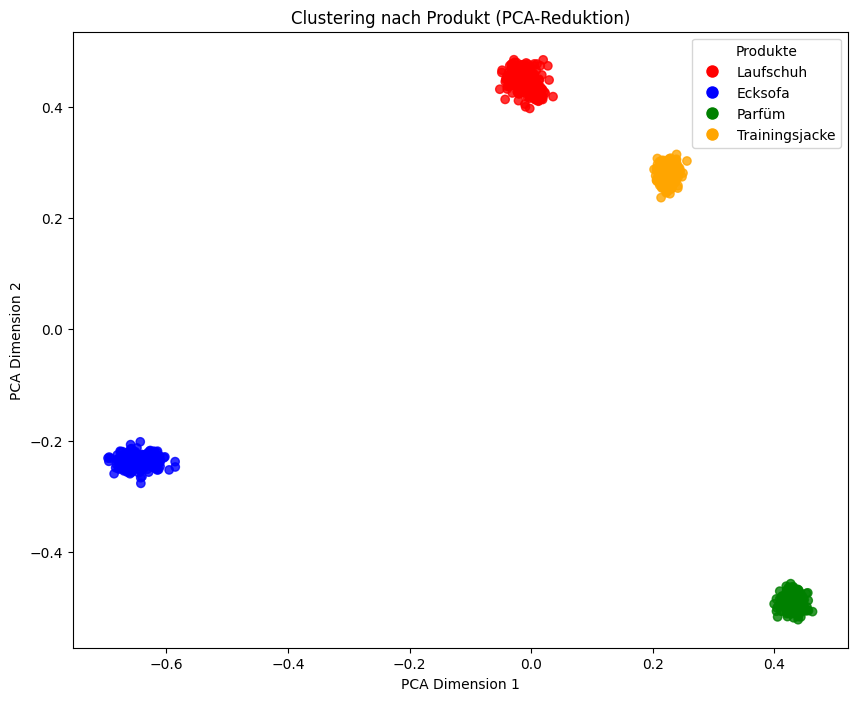

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
prod_comb_emb_reduced = pca.fit_transform(prod_comb_emb)


product_labels = []
for i in range(1000):
    if i < 250:
        product_labels.append("Laufschuh")
    elif i < 500:
        product_labels.append("Ecksofa")
    elif i < 750:
        product_labels.append("Parfüm")
    else:
        product_labels.append("Trainingsjacke")


product_to_color = {
    "Laufschuh": 'red',
    "Ecksofa": 'blue',
    "Parfüm": 'green',
    "Trainingsjacke": 'orange'
}

colors = [product_to_color[label] for label in product_labels]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


plt.title("Clustering nach Produkt (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Produkte")

plt.savefig('clustering_KI.pdf', format='pdf')
plt.show()


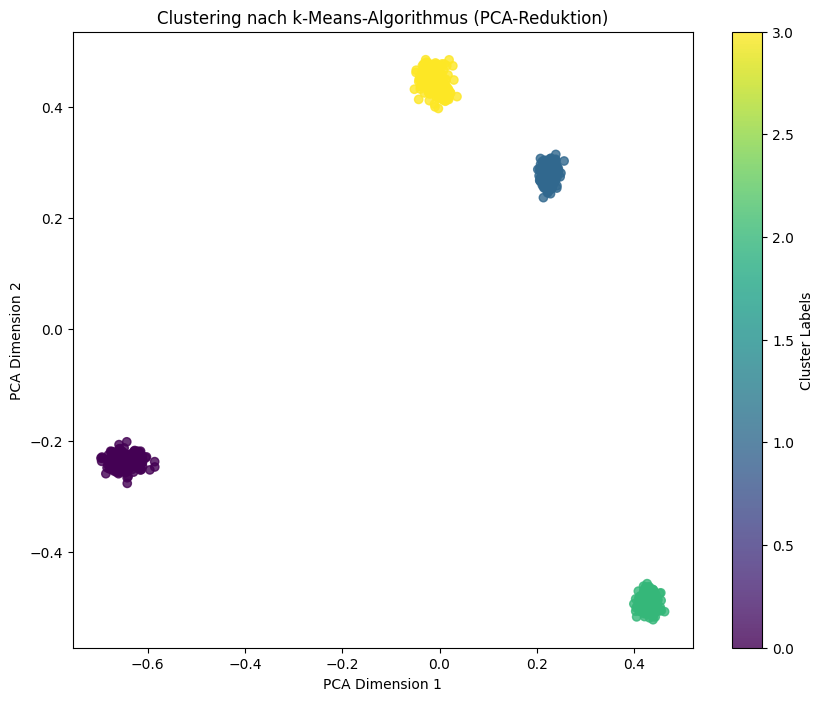

In [43]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np


pca = PCA(n_components=2)
prod_comb_emb_reduced = pca.fit_transform(prod_comb_emb)


num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)

product_labels = []
for i in range(1000):
    if i < 250:
        product_labels.append("Laufschuh")
    elif i < 500:
        product_labels.append("Ecksofa")
    elif i < 750:
        product_labels.append("Parfüm")
    else:
        product_labels.append("Trainingsjacke")


plt.figure(figsize=(10, 8))


scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)


plt.title("Clustering nach k-Means-Algorithmus (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


#for i, label in enumerate(product_labels):
#    plt.text(prod_comb_emb_reduced[i, 0] + 0.02, prod_comb_emb_reduced[i, 1], label, fontsize=9)


plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_KI_kmean.pdf', format='pdf')
plt.show()


#### Mensch ohne KI

<ipython-input-44-57f5e65543b9>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


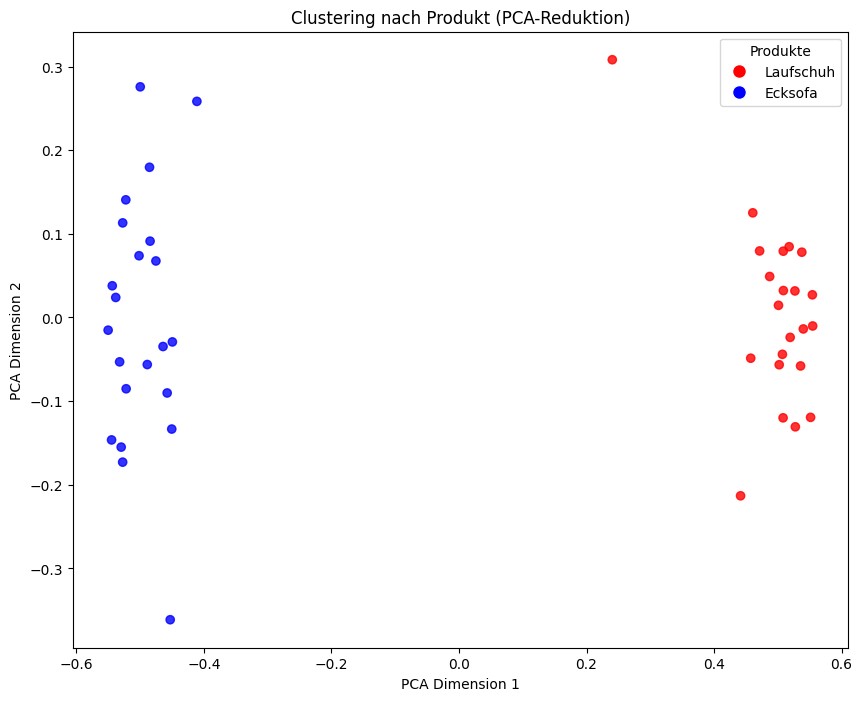

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

prod_comb_emb_ohne_KI = get_embedding(prod_1_ohne_KI + prod_2_ohne_KI)

pca = PCA(n_components=2)
prod_comb_emb_reduced = pca.fit_transform(prod_comb_emb_ohne_KI)

product_labels = []
for i in range(44):
    if i < 22:
        product_labels.append("Laufschuh")
    else:
        product_labels.append("Ecksofa")


product_to_color = {
    "Laufschuh": 'red',
    "Ecksofa": 'blue'
}


colors = [product_to_color[label] for label in product_labels]


plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


plt.title("Clustering nach Produkt (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Produkte")
plt.savefig('clustering_MenschOhneKI.pdf', format='pdf')
plt.show()


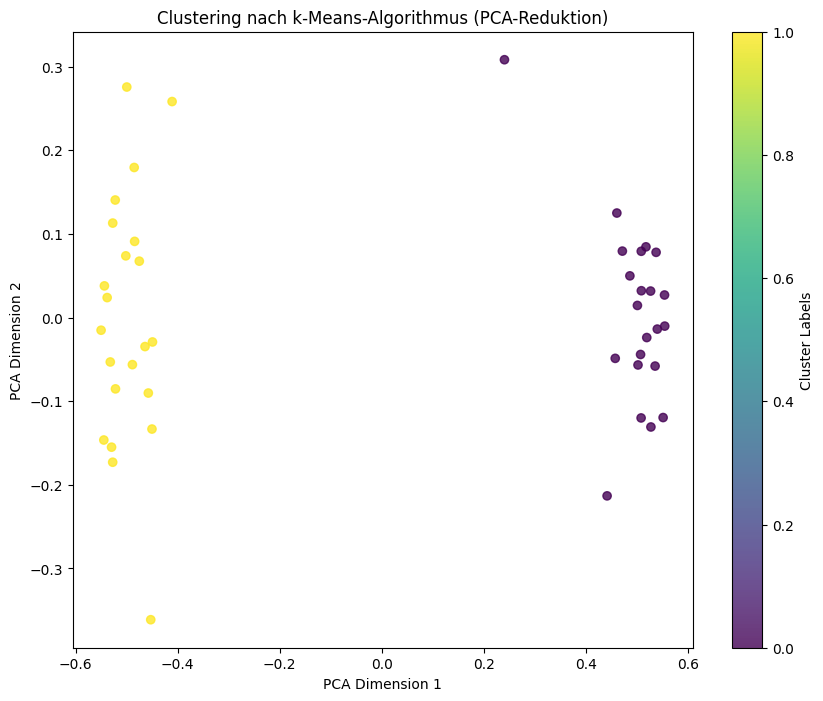

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np


pca = PCA(n_components=2)
prod_comb_emb_ohne_KI = get_embedding(prod_1_ohne_KI + prod_2_ohne_KI)
prod_comb_emb_reduced = pca.fit_transform(prod_comb_emb_ohne_KI)


num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)


product_labels = []
for i in range(44):
    if i < 22:
        product_labels.append("Product 1")
    else:
        product_labels.append("Product 2")


plt.figure(figsize=(10, 8))


scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)


plt.title("Clustering nach k-Means-Algorithmus (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


#for i, label in enumerate(product_labels):
#    plt.text(prod_comb_emb_reduced[i, 0] + 0.02, prod_comb_emb_reduced[i, 1], label, fontsize=9)


plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_MenschOhneKI_kmean.pdf', format='pdf')
plt.show()


#### Mensch mit KI

<ipython-input-46-a7455a1756c0>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


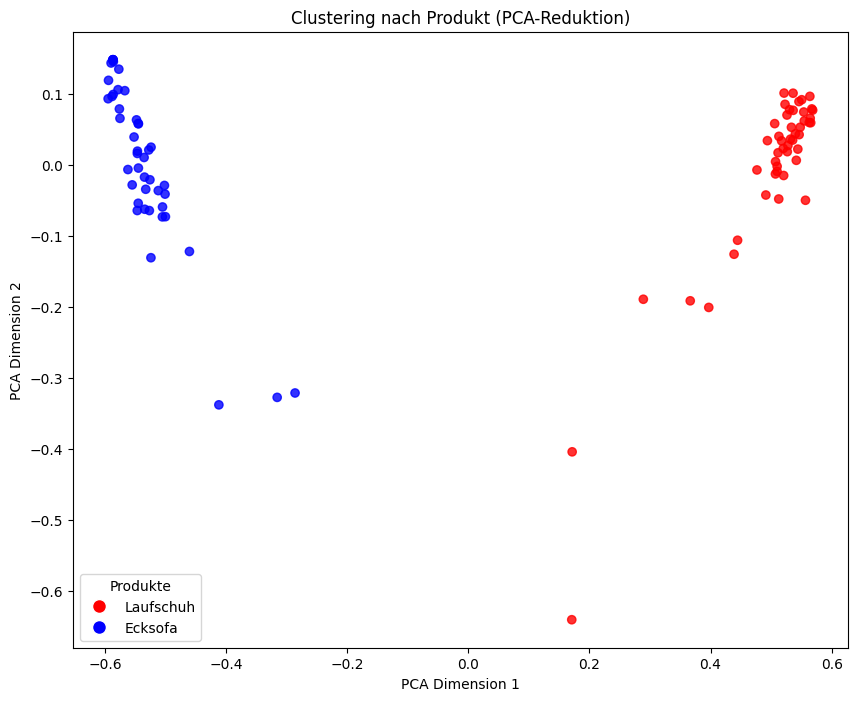

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

prod_comb_emb_mit_KI = get_embedding(prod_1_mit_KI + prod_2_mit_KI)
# Example: Reducing dimensionality to 2D with PCA
pca = PCA(n_components=2)
prod_comb_emb_reduced = pca.fit_transform(prod_comb_emb_mit_KI)

# Example list of labels for each product (these should correspond to the points)
product_labels = []
for i in range(93):  # Assuming you have 8 products, adjust this as needed for your dataset
    if i < 48:
        product_labels.append("Laufschuh")
    else:
        product_labels.append("Ecksofa")

# Define a dictionary to map each product to a color
product_to_color = {
    "Laufschuh": 'red',
    "Ecksofa": 'blue'
}

# Create a list of colors corresponding to the product labels
colors = [product_to_color[label] for label in product_labels]

# Plot with colors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)

# Add title and axis labels
plt.title("Clustering nach Produkt (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")

# Create a custom legend for the product colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Produkte")
plt.savefig('clustering_MenschMitKI.pdf', format='pdf')
plt.show()


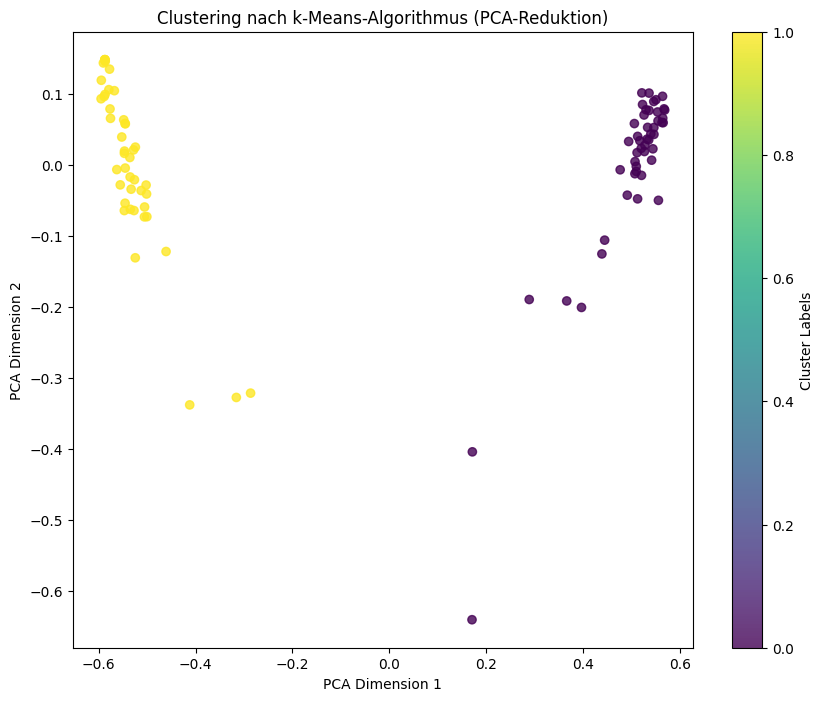

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Assuming emb_1_KMIK is a numpy array of your embeddings
# Example: Reducing dimensionality to 2D with PCA
pca = PCA(n_components=2)
prod_comb_emb_mit_KI = get_embedding(prod_1_mit_KI + prod_2_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(prod_comb_emb_mit_KI)

# Perform KMeans clustering
num_clusters = 2  # You can set the number of clusters based on your use case
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)

# Example list of product labels for each product (these should correspond to the points)
product_labels = []
for i in range(93):  # Assuming you have 8 products, adjust this as needed for your dataset
    if i < 48:
        product_labels.append("Product 1")
    else:
        product_labels.append("Product 2")

# Generate the plot
plt.figure(figsize=(10, 8))

# Scatter plot where color is based on clusters
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)

# Add title and axis labels
plt.title("Clustering nach k-Means-Algorithmus (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")

# Attach product labels next to each point
#for i, label in enumerate(product_labels):
#    plt.text(prod_comb_emb_reduced[i, 0] + 0.02, prod_comb_emb_reduced[i, 1], label, fontsize=9)

# Add a color bar to show cluster numbers
plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_MenschMitKI_kmean.pdf', format='pdf')
plt.show()


# 8. Vergleichende Analyse

### Kosinus-Ähnlichkeit (Cosine Similarity)

In [48]:
#### KI mit Mensch ohne KI
similarity_1_KMOK = cosine_similarity(prod_1_emb, prod_1_ohne_KI_emb)
similarity_2_KMOK = cosine_similarity(prod_2_emb, prod_2_ohne_KI_emb)
mean_similarity_1_KMOK = np.mean(similarity_1_KMOK)
mean_similarity_2_KMOK = np.mean(similarity_2_KMOK)

print(f"Mean Similarity Produkt 1 KMOK: {mean_similarity_1_KMOK}")
print(f"Mean Similarity Produkt 2 KMOK: {mean_similarity_2_KMOK}")

#### KI mit Mensch mit KI
similarity_1_KMIK = cosine_similarity(prod_1_emb, prod_1_mit_KI_emb)
similarity_2_KMIK = cosine_similarity(prod_2_emb, prod_2_mit_KI_emb)
mean_similarity_1_KMIK = np.mean(similarity_1_KMIK)
mean_similarity_2_KMIK = np.mean(similarity_2_KMIK)

print(f"Mean Similarity Produkt 1 KMIK: {mean_similarity_1_KMIK}")
print(f"Mean Similarity Produkt 2 KMIK: {mean_similarity_2_KMIK}")

Mean Similarity Produkt 1 KMOK: 0.8277222429109881
Mean Similarity Produkt 2 KMOK: 0.7923909978686021
Mean Similarity Produkt 1 KMIK: 0.8597278996150783
Mean Similarity Produkt 2 KMIK: 0.8527705604496447


In [49]:
from lets_plot import *
import pandas as pd


LetsPlot.setup_html()

values = [mean_similarity_1, mean_similarity_2,
          mean_similarity_1_ohne_KI, mean_similarity_2_ohne_KI,
          mean_similarity_1_mit_KI, mean_similarity_2_mit_KI]


labels = ['Laufschuh', 'Ecksofa',
          'Laufschuh', 'Ecksofa',
          'Laufschuh', 'Ecksofa']

categories = ['KI GPT 4o-mini'] * 2 + ['Mensch ohne KI-Vorschlag'] * 2 + ['Mensch mit KI-Vorschlag'] * 2


df = pd.DataFrame({
    'Produkt': labels,
    'Kosinus-Ähnlichkeit': values,
    'Generierung durch': categories
})

custom_colors = ['#1f77b4', '#2ca02c', '#ff7f0e']


p = ggplot(df, aes(x='Produkt', y='Kosinus-Ähnlichkeit', fill='Generierung durch')) + \
    geom_bar(stat='identity', position='dodge') + \
    scale_fill_manual(values=custom_colors) + \
    ggsize(700, 400) + \
    theme(axis_text_x=element_text(angle=0, hjust=1))
ggsave(p, 'vergleich_kosinus.pdf')

p.show()


### Type-Token Ratio (TTR)

In [50]:
from lets_plot import *
import pandas as pd


LetsPlot.setup_html()


values = [ttr_prod_1, ttr_prod_2,
          ttr_prod_1_ohne_KI, ttr_prod_2_ohne_KI,
          ttr_prod_1_mit_KI, ttr_prod_2_mit_KI]


labels = ['Laufschuh', 'Ecksofa',
          'Laufschuh', 'Ecksofa',
          'Laufschuh', 'Ecksofa']


categories = ['KI GPT 4o-mini'] * 2 + ['Mensch ohne KI-Vorschlag'] * 2 + ['Mensch mit KI-Vorschlag'] * 2


df = pd.DataFrame({
    'Produkt': labels,
    'Type-Token Ratio (TTR)': values,
    'Generierung durch': categories
})

custom_colors = ['#1f77b4', '#2ca02c', '#ff7f0e']


p = ggplot(df, aes(x='Produkt', y='Type-Token Ratio (TTR)', fill='Generierung durch')) + \
    geom_bar(stat='identity', position='dodge') + \
    scale_fill_manual(values=custom_colors) + \
    ggsize(700, 400) + \
    theme(axis_text_x=element_text(angle=0, hjust=1))

ggsave(p, 'vergleich_ttr.pdf')

p.show()


### Clustering

#### KI - Mensch ohne KI

##### Produkt 1

<ipython-input-51-187346fe9035>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


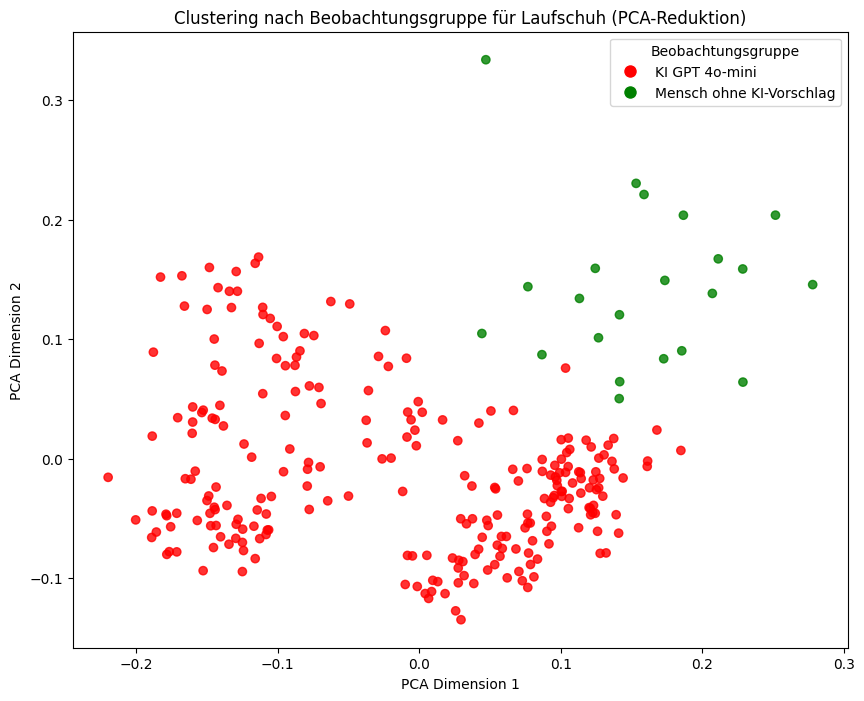

In [51]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
emb_1_KMOK = get_embedding(prod_1 + prod_1_ohne_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_1_KMOK)


product_labels = []
for i in range(272):
    if i < 250:
        product_labels.append("KI GPT 4o-mini")
    else:
        product_labels.append("Mensch ohne KI-Vorschlag")

product_to_color = {
    "KI GPT 4o-mini": 'red',
    "Mensch ohne KI-Vorschlag": 'green',
}


colors = [product_to_color[label] for label in product_labels]


plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


plt.title("Clustering nach Beobachtungsgruppe für Laufschuh (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Beobachtungsgruppe")
plt.savefig('clustering_KMOK_1.pdf', format='pdf')
plt.show()


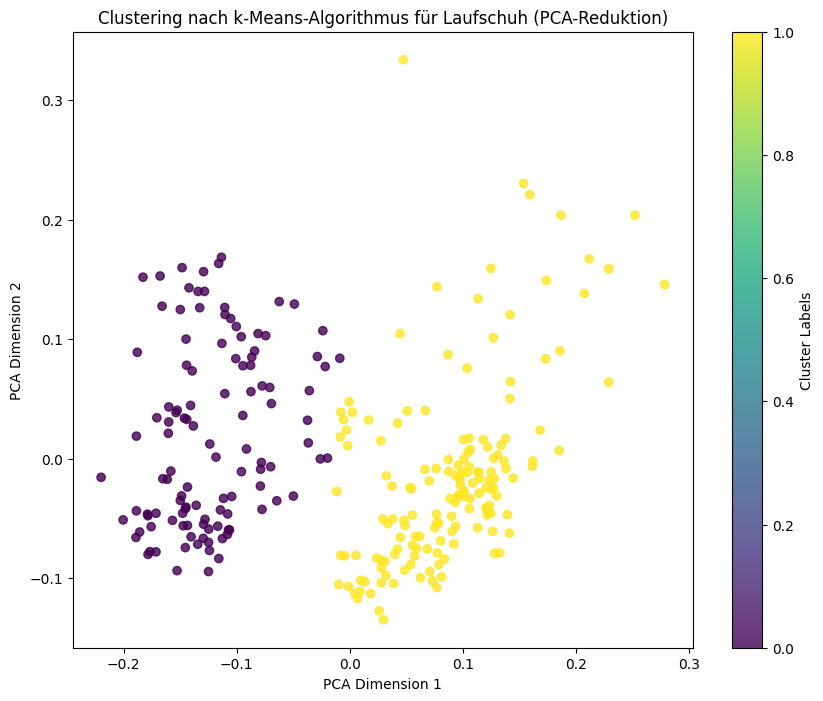

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np


pca = PCA(n_components=2)
emb_1_KMOK = get_embedding(prod_1 + prod_1_ohne_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_1_KMOK)


num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)


product_labels = []
for i in range(272):
    if i < 250:
        product_labels.append("Product 1")
    else:
        product_labels.append("Product 1 Mensch ohne KI")


plt.figure(figsize=(10, 8))


scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)


plt.title("Clustering nach k-Means-Algorithmus für Laufschuh (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


#for i, label in enumerate(product_labels):
#    plt.text(prod_comb_emb_reduced[i, 0] + 0.02, prod_comb_emb_reduced[i, 1], label, fontsize=9)


plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_KMOK_1_kmean.pdf', format='pdf')
plt.show()


##### Produkt 2

<ipython-input-53-14ce5e8705c6>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


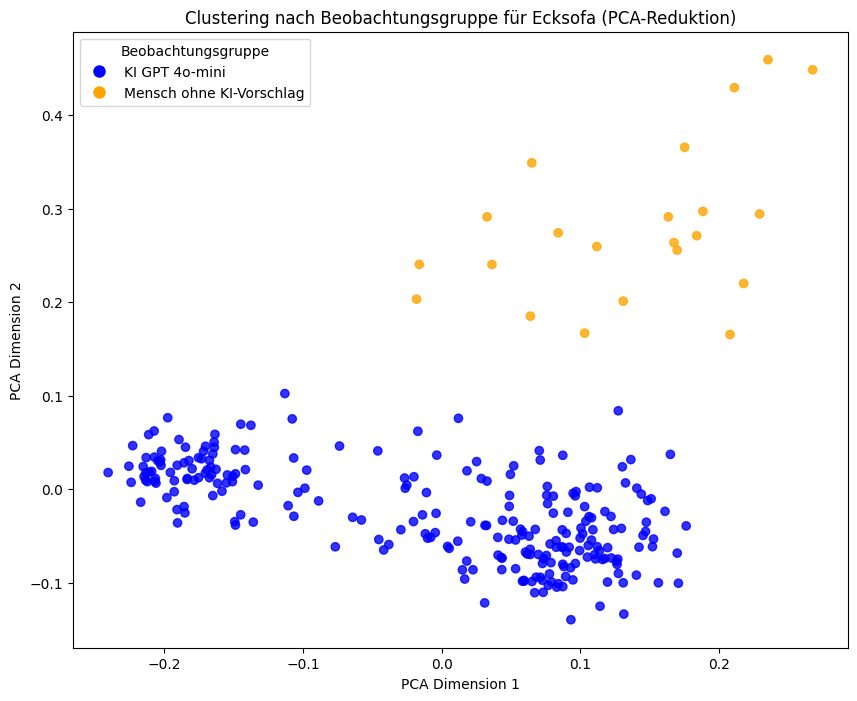

In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
emb_2_KMOK = get_embedding(prod_2 + prod_2_ohne_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_2_KMOK)

product_labels = []
for i in range(272):
    if i < 250:
        product_labels.append("KI GPT 4o-mini")
    else:
        product_labels.append("Mensch ohne KI-Vorschlag")


product_to_color = {
    "KI GPT 4o-mini": 'blue',
    "Mensch ohne KI-Vorschlag": 'orange',
}

colors = [product_to_color[label] for label in product_labels]


plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


plt.title("Clustering nach Beobachtungsgruppe für Ecksofa (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Beobachtungsgruppe")
plt.savefig('clustering_KMOK_2.pdf', format='pdf')
plt.show()


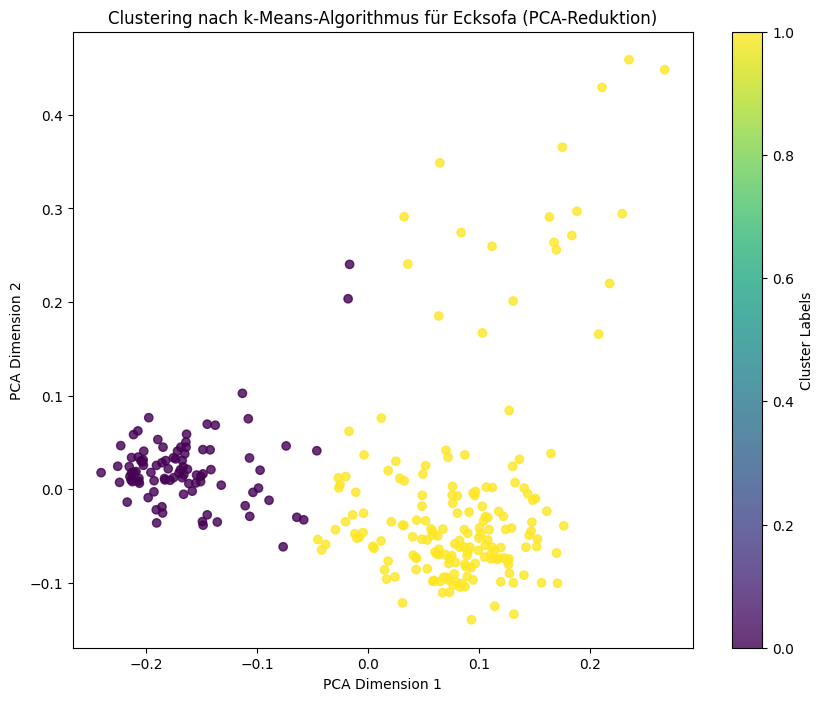

In [54]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np


pca = PCA(n_components=2)
emb_2_KMOK = get_embedding(prod_2 + prod_2_ohne_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_2_KMOK)


num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)


product_labels = []
for i in range(272):
    if i < 250:
        product_labels.append("Product 2")
    else:
        product_labels.append("Product 2 Mensch ohne KI")


plt.figure(figsize=(10, 8))


scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)


plt.title("Clustering nach k-Means-Algorithmus für Ecksofa (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


#for i, label in enumerate(product_labels):
#    plt.text(prod_comb_emb_reduced[i, 0] + 0.02, prod_comb_emb_reduced[i, 1], label, fontsize=9)


plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_KMOK_2_kmean.pdf', format='pdf')
plt.show()


##### Beide Produkte

<ipython-input-55-bbd6ed4240f2>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


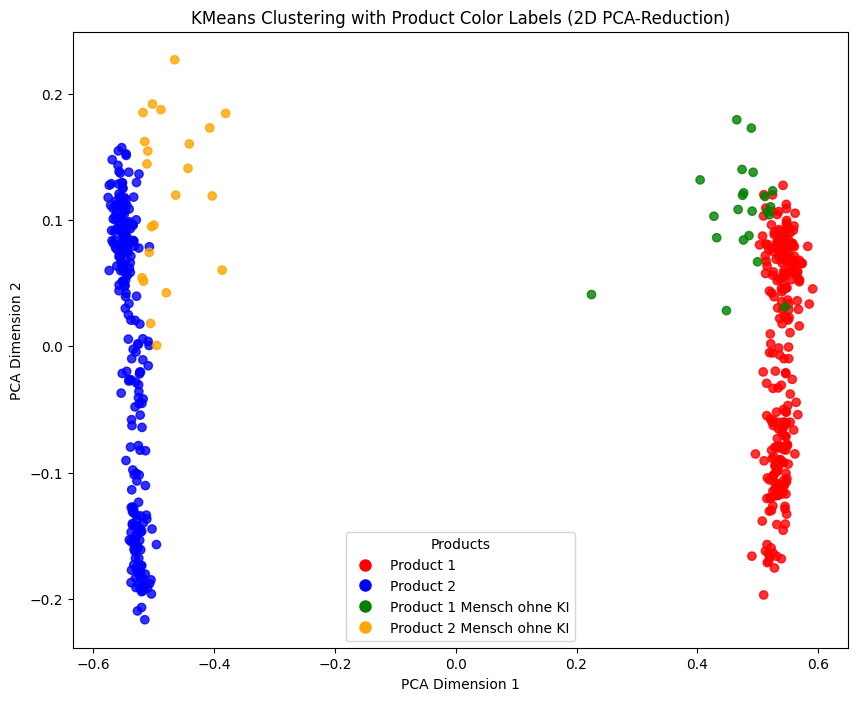

In [55]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
emb_KMOK = get_embedding(prod_1 + prod_2 + prod_1_ohne_KI + prod_2_ohne_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_KMOK)


product_labels = []
for i in range(544):
    if i < 250:
        product_labels.append("Product 1")
    elif i < 500:
        product_labels.append("Product 2")
    elif i < 522:
        product_labels.append("Product 1 Mensch ohne KI")
    else:
        product_labels.append("Product 2 Mensch ohne KI")


product_to_color = {
    "Product 1": 'red',
    "Product 2": 'blue',
    "Product 1 Mensch ohne KI": 'green',
    "Product 2 Mensch ohne KI": 'orange'
}


colors = [product_to_color[label] for label in product_labels]


plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


plt.title("KMeans Clustering with Product Color Labels (2D PCA-Reduction)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Products")
plt.savefig('clustering_KMOK_both.pdf', format='pdf')
plt.show()


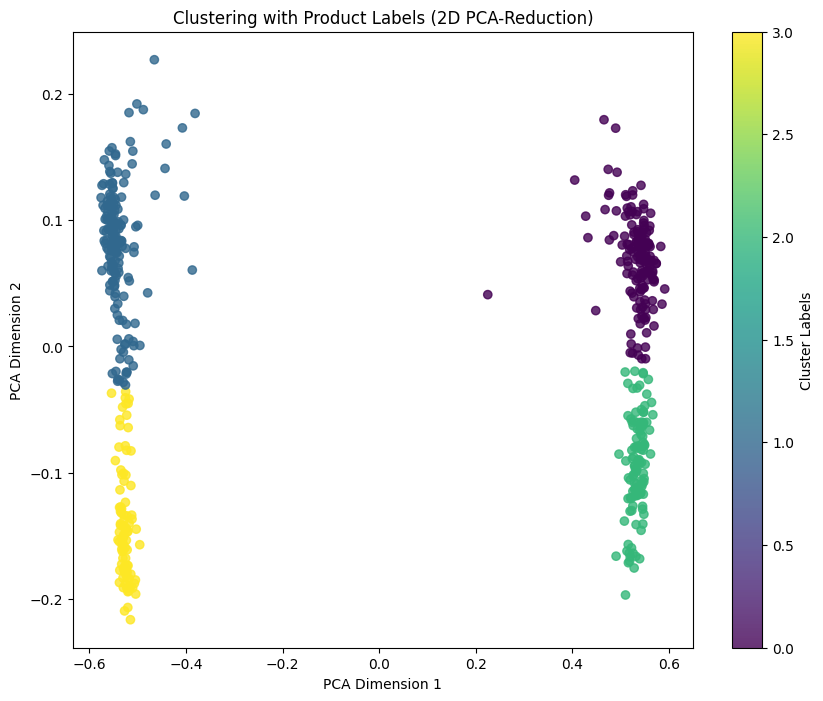

In [56]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np


pca = PCA(n_components=2)
emb_KMOK = get_embedding(prod_1 + prod_2 + prod_1_ohne_KI + prod_2_ohne_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_KMOK)


num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)


product_labels = []
for i in range(544):
    if i < 250:
        product_labels.append("Product 1")
    elif i < 500:
        product_labels.append("Product 2")
    elif i < 522:
        product_labels.append("Product 1 Mensch ohne KI")
    else:
        product_labels.append("Product 2 Mensch ohne KI")

plt.figure(figsize=(10, 8))

scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)


plt.title("Clustering with Product Labels (2D PCA-Reduction)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


#for i, label in enumerate(product_labels):
#    plt.text(prod_comb_emb_reduced[i, 0] + 0.02, prod_comb_emb_reduced[i, 1], label, fontsize=9)


plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_KMOK_both_kmean.pdf', format='pdf')
plt.show()


#### KI - Mensch mit KI

##### Produkt 1

<ipython-input-57-e81cdc3ab899>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


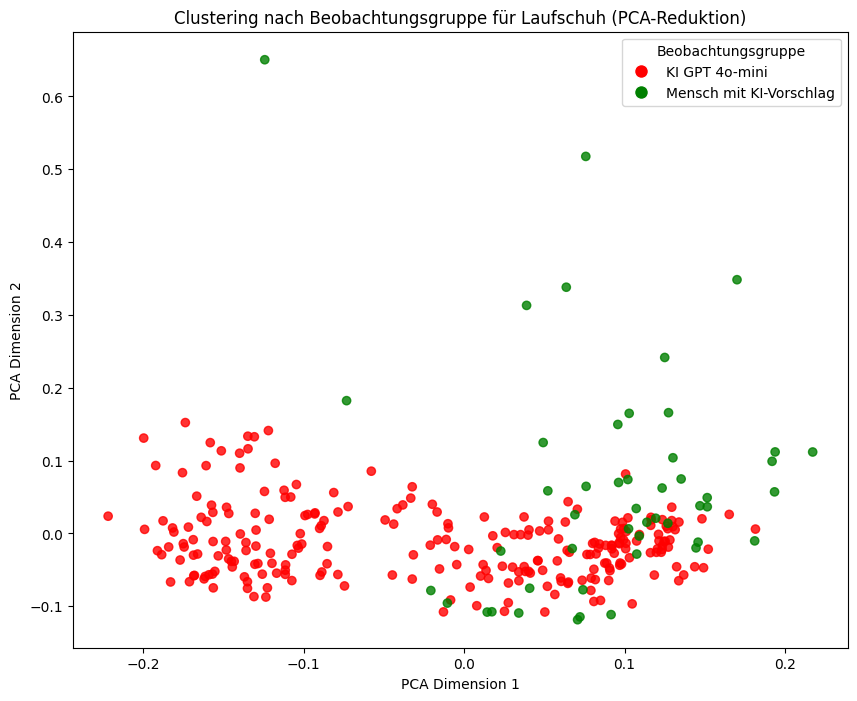

In [57]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
emb_1_KMIK = get_embedding(prod_1 + prod_1_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_1_KMIK)


product_labels = []
for i in range(298):
    if i < 250:
        product_labels.append("KI GPT 4o-mini")
    else:
        product_labels.append("Mensch mit KI-Vorschlag")


product_to_color = {
    "KI GPT 4o-mini": 'red',
    "Mensch mit KI-Vorschlag": 'green',
}


colors = [product_to_color[label] for label in product_labels]


plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


plt.title("Clustering nach Beobachtungsgruppe für Laufschuh (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Beobachtungsgruppe")
plt.savefig('clustering_KMIK_1.pdf', format='pdf')
plt.show()


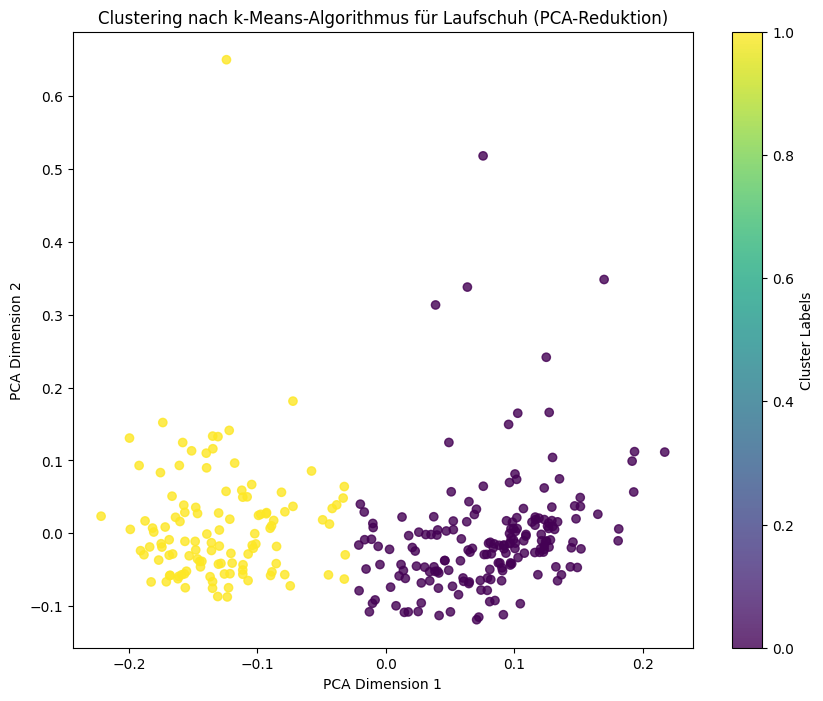

In [58]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np


pca = PCA(n_components=2)
emb_1_KMIK = get_embedding(prod_1 + prod_1_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_1_KMIK)


num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)


product_labels = []
for i in range(298):
    if i < 250:
        product_labels.append("Product 1")
    else:
        product_labels.append("Product 1 Mensch mit KI")


plt.figure(figsize=(10, 8))


scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)


plt.title("Clustering nach k-Means-Algorithmus für Laufschuh (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_KMIK_1_kmean.pdf', format='pdf')
plt.show()


##### Produkt 2

<ipython-input-59-fa4d024545f7>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


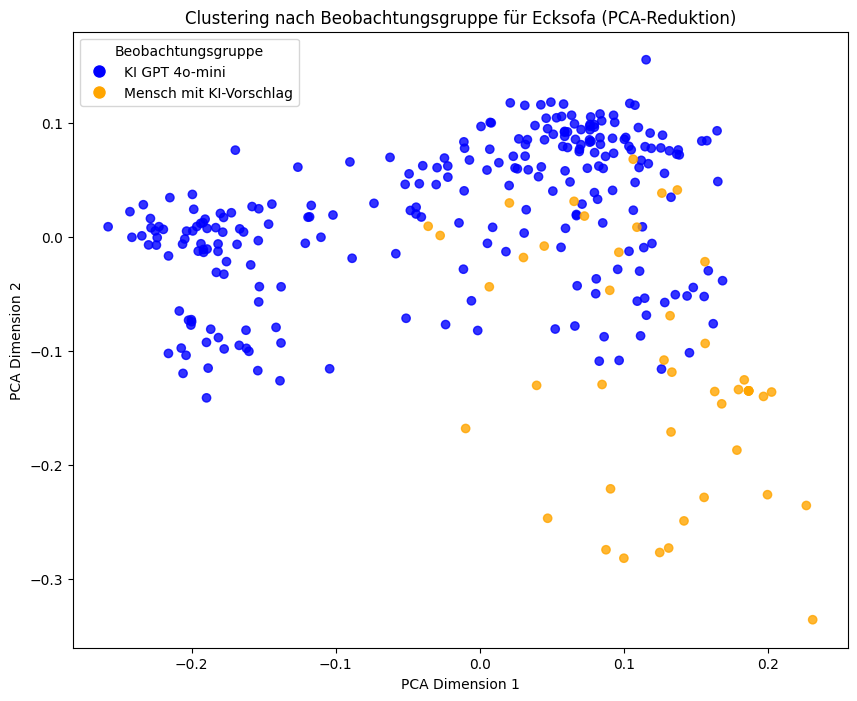

In [59]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
emb_2_KMIK = get_embedding(prod_2 + prod_2_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_2_KMIK)


product_labels = []
for i in range(295):
    if i < 250:
        product_labels.append("KI GPT 4o-mini")
    else:
        product_labels.append("Mensch mit KI-Vorschlag")


product_to_color = {
    "KI GPT 4o-mini": 'blue',
    "Mensch mit KI-Vorschlag": 'orange',
}


colors = [product_to_color[label] for label in product_labels]


plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


plt.title("Clustering nach Beobachtungsgruppe für Ecksofa (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Beobachtungsgruppe")
plt.savefig('clustering_KMIK_2.pdf', format='pdf')
plt.show()


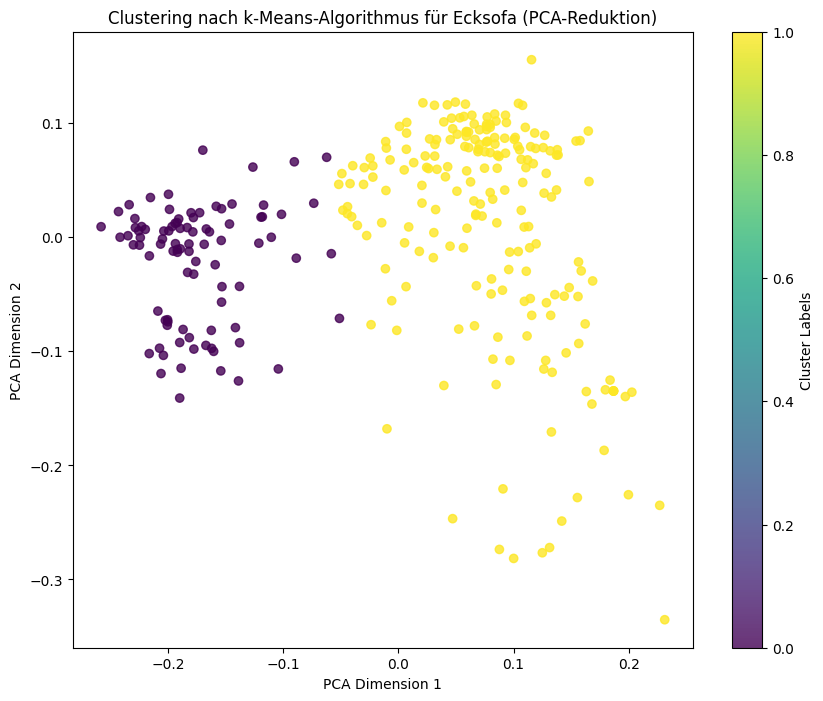

In [60]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Assuming emb_1_KMIK is a numpy array of your embeddings
# Example: Reducing dimensionality to 2D with PCA
pca = PCA(n_components=2)
emb_2_KMIK = get_embedding(prod_2 + prod_2_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_2_KMIK)

# Perform KMeans clustering
num_clusters = 2 # You can set the number of clusters based on your use case
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)

# Example list of product labels for each product (these should correspond to the points)
product_labels = []
for i in range(295):  # Assuming you have 8 products, adjust this as needed for your dataset
    if i < 250:
        product_labels.append("Product 2")
    else:
        product_labels.append("Product 2 Mensch mit KI")

# Generate the plot
plt.figure(figsize=(10, 8))

# Scatter plot where color is based on clusters
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)

# Add title and axis labels
plt.title("Clustering nach k-Means-Algorithmus für Ecksofa (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")

# Attach product labels next to each point
#for i, label in enumerate(product_labels):
#    plt.text(prod_comb_emb_reduced[i, 0] + 0.02, prod_comb_emb_reduced[i, 1], label, fontsize=9)

# Add a color bar to show cluster numbers
plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_KMIK_2_kmean.pdf', format='pdf')
plt.show()


##### Beide Produkte

<ipython-input-61-af4547cbbfdd>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


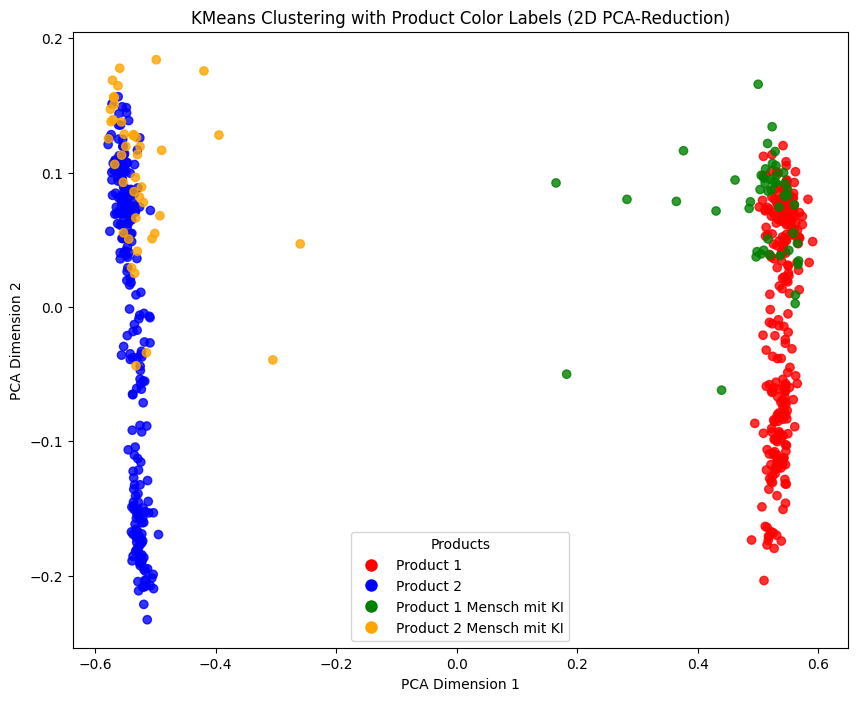

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
emb_KMIK = get_embedding(prod_1 + prod_2 + prod_1_mit_KI + prod_2_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_KMIK)


product_labels = []
for i in range(593):
    if i < 250:
        product_labels.append("Product 1")
    elif i < 500:
        product_labels.append("Product 2")
    elif i < 548:
        product_labels.append("Product 1 Mensch mit KI")
    else:
        product_labels.append("Product 2 Mensch mit KI")


product_to_color = {
    "Product 1": 'red',
    "Product 2": 'blue',
    "Product 1 Mensch mit KI": 'green',
    "Product 2 Mensch mit KI": 'orange'
}


colors = [product_to_color[label] for label in product_labels]


plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


plt.title("KMeans Clustering with Product Color Labels (2D PCA-Reduction)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Products")
plt.savefig('clustering_KMIK_both.pdf', format='pdf')
plt.show()


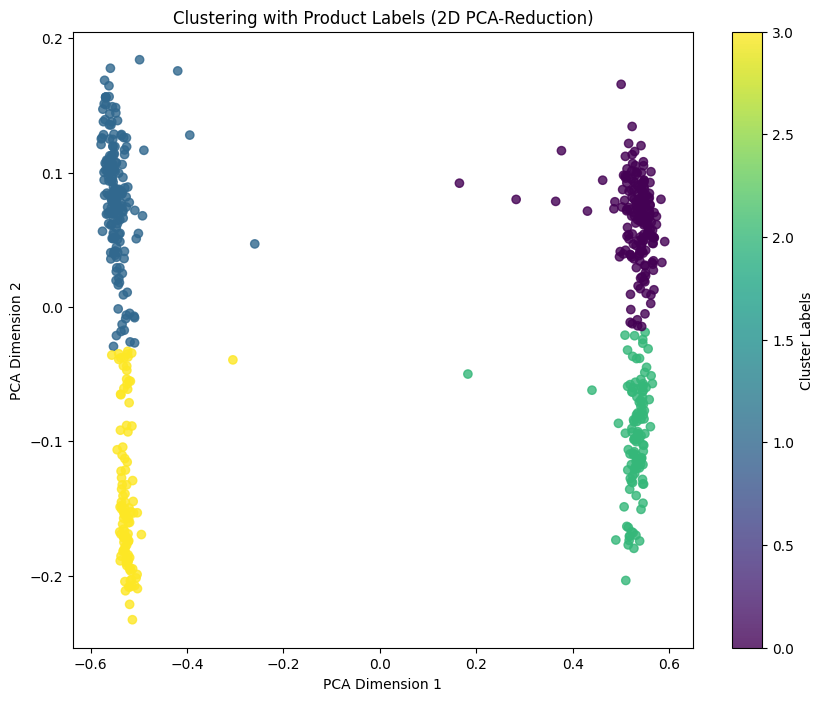

In [62]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Assuming emb_1_KMIK is a numpy array of your embeddings
# Example: Reducing dimensionality to 2D with PCA
pca = PCA(n_components=2)
emb_KMIK = get_embedding(prod_1 + prod_2 + prod_1_mit_KI + prod_2_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_KMIK)

# Perform KMeans clustering
num_clusters = 4 # You can set the number of clusters based on your use case
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)

# Example list of product labels for each product (these should correspond to the points)
product_labels = []
for i in range(593):  # Assuming you have 8 products, adjust this as needed for your dataset
    if i < 250:
        product_labels.append("Product 1")
    elif i < 500:
        product_labels.append("Product 2")
    elif i < 548:
        product_labels.append("Product 1 Mensch mit KI")
    else:
        product_labels.append("Product 2 Mensch mit KI")

# Generate the plot
plt.figure(figsize=(10, 8))

# Scatter plot where color is based on clusters
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)

# Add title and axis labels
plt.title("Clustering with Product Labels (2D PCA-Reduction)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")

# Attach product labels next to each point
#for i, label in enumerate(product_labels):
#    plt.text(prod_comb_emb_reduced[i, 0] + 0.02, prod_comb_emb_reduced[i, 1], label, fontsize=9)

# Add a color bar to show cluster numbers
plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_KMIK_both_kmean.pdf', format='pdf')
plt.show()


#### Alle zusammen

##### Produkt 1

<ipython-input-63-1f7da6c0e6f1>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


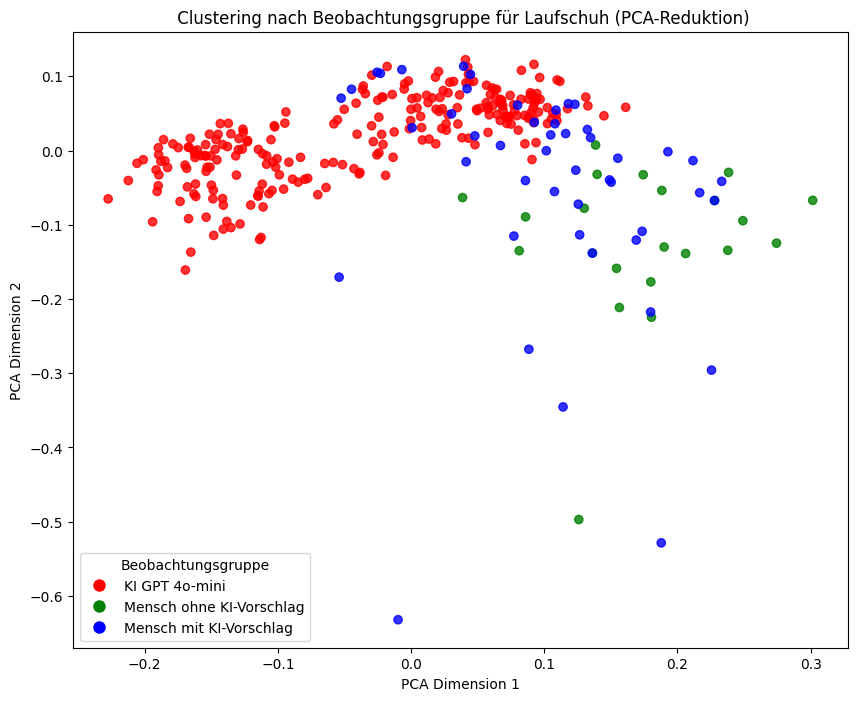

In [63]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
emb_1 = get_embedding(prod_1 + prod_1_ohne_KI + prod_1_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_1)


product_labels = []
for i in range(320):
    if i < 250:
        product_labels.append("KI GPT 4o-mini")
    elif i < 272:
        product_labels.append("Mensch ohne KI-Vorschlag")
    else:
        product_labels.append("Mensch mit KI-Vorschlag")


product_to_color = {
    "KI GPT 4o-mini": 'red',
    "Mensch ohne KI-Vorschlag": 'green',
    "Mensch mit KI-Vorschlag" : 'blue'
}

colors = [product_to_color[label] for label in product_labels]


plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


plt.title(" Clustering nach Beobachtungsgruppe für Laufschuh (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Beobachtungsgruppe")
plt.savefig('clustering_1.pdf', format='pdf')
plt.show()


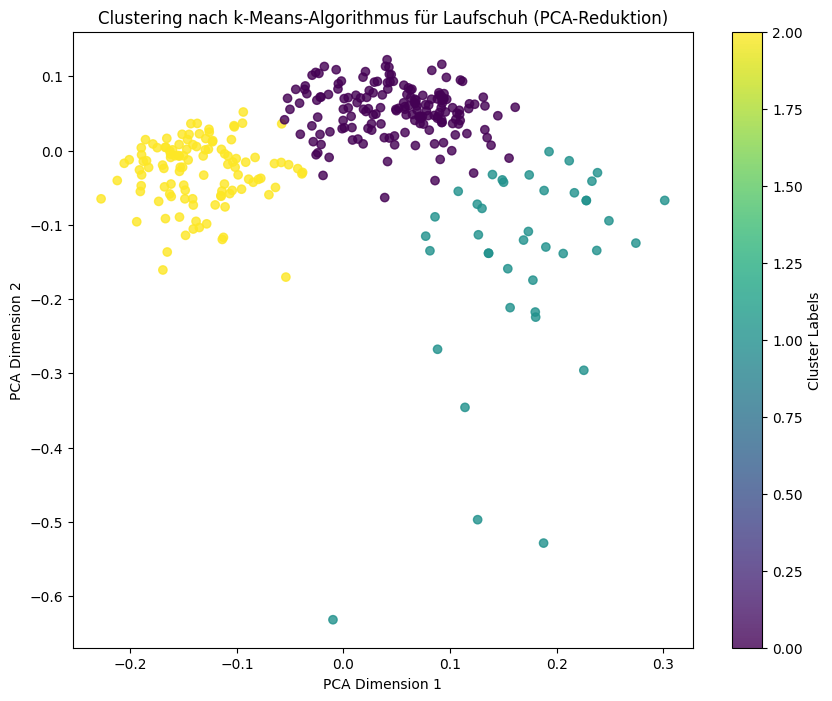

In [64]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np


pca = PCA(n_components=2)
emb_1 = get_embedding(prod_1 + prod_1_ohne_KI + prod_1_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_1)


num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)


product_labels = []
for i in range(320):
    if i < 250:
        product_labels.append("Product 1")
    elif i < 272:
        product_labels.append("Product 1 Mensch ohne KI")
    else:
        product_labels.append("Product 1 Mensch mit KI")


plt.figure(figsize=(10, 8))


scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)


plt.title("Clustering nach k-Means-Algorithmus für Laufschuh (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


#for i, label in enumerate(product_labels):
#    plt.text(prod_comb_emb_reduced[i, 0] + 0.02, prod_comb_emb_reduced[i, 1], label, fontsize=9)


plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_1_kmean.pdf', format='pdf')
plt.show()


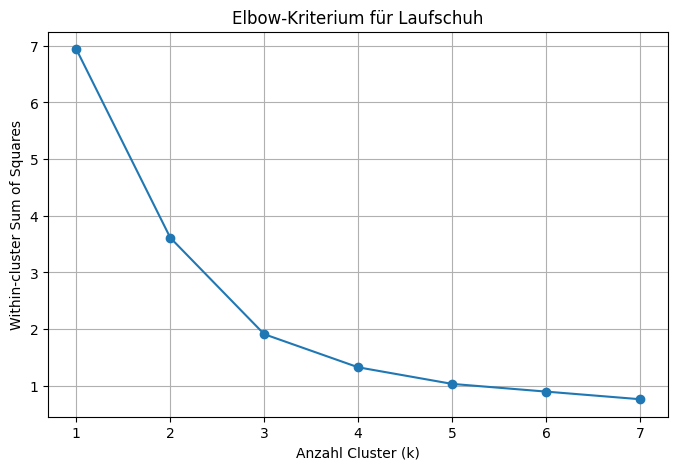

In [65]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


k_values = range(1, 8)


inertia_values = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(prod_comb_emb_reduced)
    inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow-Kriterium für Laufschuh')
plt.xlabel('Anzahl Cluster (k)')
plt.ylabel('Within-cluster Sum of Squares')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('clustering_elbow_1.pdf', format='pdf')
plt.show()


##### Produkt 2

<ipython-input-66-54fdf3b08778>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


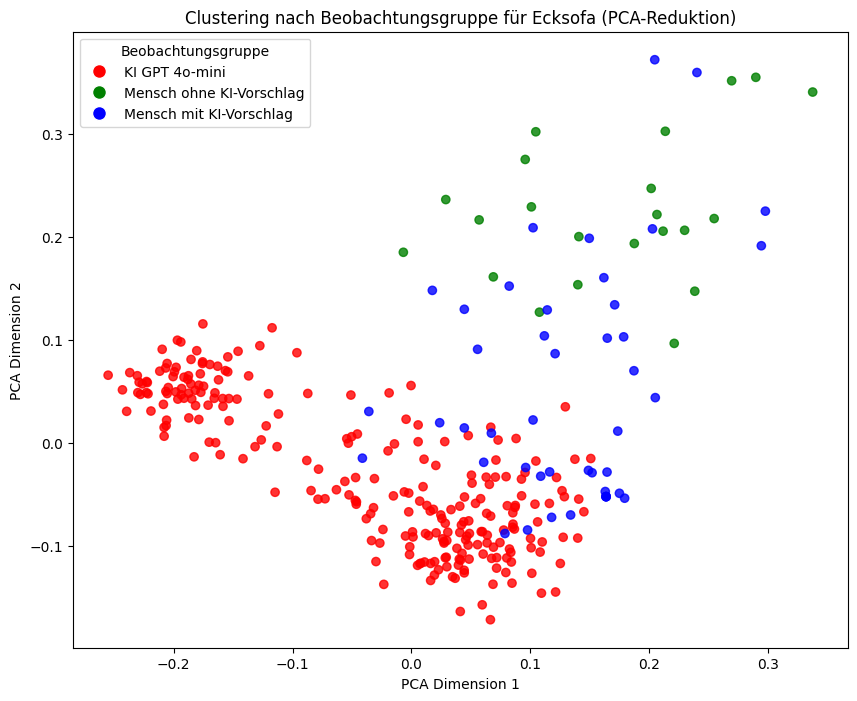

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
emb_2 = get_embedding(prod_2 + prod_2_ohne_KI + prod_2_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_2)


product_labels = []
for i in range(317):
    if i < 250:
        product_labels.append("KI GPT 4o-mini")
    elif i < 272:
        product_labels.append("Mensch ohne KI-Vorschlag")
    else:
        product_labels.append("Mensch mit KI-Vorschlag")


product_to_color = {
    "KI GPT 4o-mini": 'red',
    "Mensch ohne KI-Vorschlag": 'green',
    "Mensch mit KI-Vorschlag" : 'blue'
}


colors = [product_to_color[label] for label in product_labels]


plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)

plt.title("Clustering nach Beobachtungsgruppe für Ecksofa (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Beobachtungsgruppe")
plt.savefig('clustering_2.pdf', format='pdf')
plt.show()


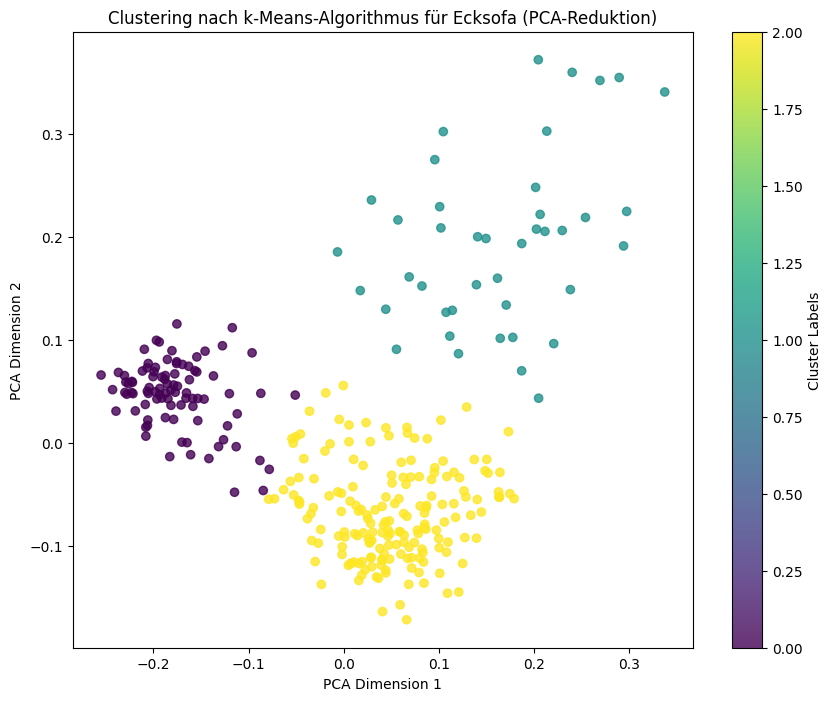

In [67]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np


pca = PCA(n_components=2)
emb_2 = get_embedding(prod_2 + prod_2_ohne_KI + prod_2_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_2)


num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)


product_labels = []
for i in range(317):
    if i < 250:
        product_labels.append("Product 2")
    elif i < 272:
        product_labels.append("Product 2 Mensch ohne KI")
    else:
        product_labels.append("Product 2 Mensch mit KI")


plt.figure(figsize=(10, 8))


scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)


plt.title("Clustering nach k-Means-Algorithmus für Ecksofa (PCA-Reduktion)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


#for i, label in enumerate(product_labels):
#    plt.text(prod_comb_emb_reduced[i, 0] + 0.02, prod_comb_emb_reduced[i, 1], label, fontsize=9)


plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_2_kmean.pdf', format='pdf')
plt.show()


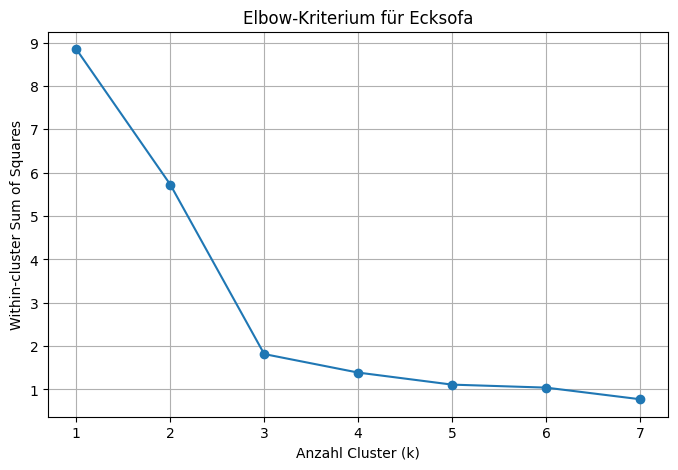

In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


k_values = range(1, 8)


inertia_values = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(prod_comb_emb_reduced)
    inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow-Kriterium für Ecksofa')
plt.xlabel('Anzahl Cluster (k)')
plt.ylabel('Within-cluster Sum of Squares')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('clustering_elbow_2.pdf', format='pdf')
plt.show()


##### Beide Produkte

<ipython-input-69-a1e0e5fb8203>:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


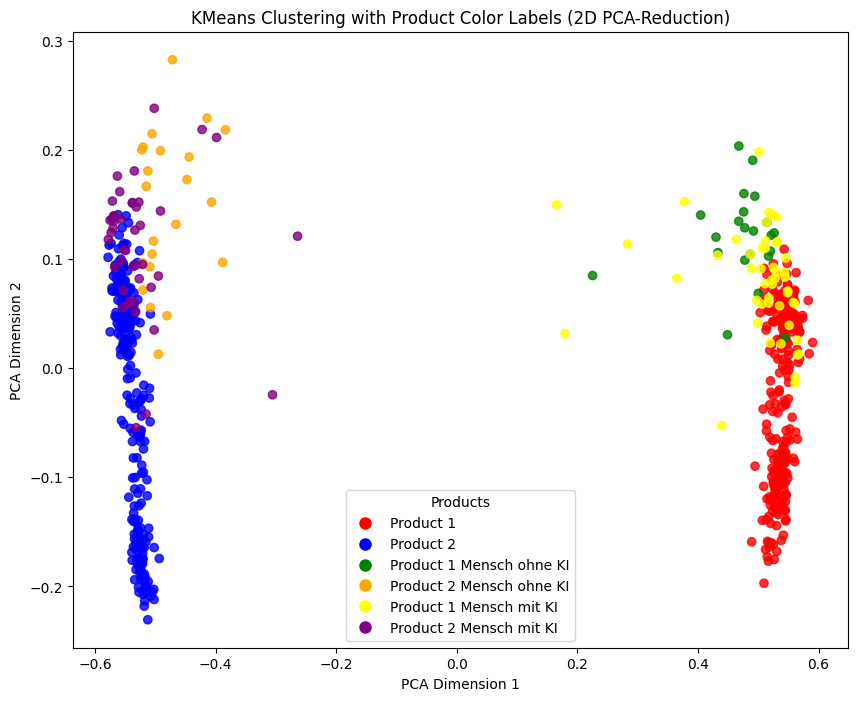

In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
emb_together = get_embedding(prod_1 + prod_2 + prod_1_ohne_KI + prod_2_ohne_KI + prod_1_mit_KI + prod_2_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_together)


product_labels = []
for i in range(637):
    if i < 250:
        product_labels.append("Product 1")
    elif i < 500:
        product_labels.append("Product 2")
    elif i < 522:
        product_labels.append("Product 1 Mensch ohne KI")
    elif i < 544:
        product_labels.append("Product 2 Mensch ohne KI")
    elif i < 592:
        product_labels.append("Product 1 Mensch mit KI")
    else:
        product_labels.append("Product 2 Mensch mit KI")


product_to_color = {
    "Product 1": 'red',
    "Product 2": 'blue',
    "Product 1 Mensch ohne KI": 'green',
    "Product 2 Mensch ohne KI": 'orange',
    "Product 1 Mensch mit KI": 'yellow',
    "Product 2 Mensch mit KI": 'purple'
}


colors = [product_to_color[label] for label in product_labels]


plt.figure(figsize=(10, 8))
scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1], c=colors, cmap=colors, alpha=0.8)


plt.title("KMeans Clustering with Product Color Labels (2D PCA-Reduction)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                          markerfacecolor=color, markersize=10)
                   for product, color in product_to_color.items()]
plt.legend(handles=legend_elements, title="Products")
plt.savefig('clustering_both.pdf', format='pdf')
plt.show()


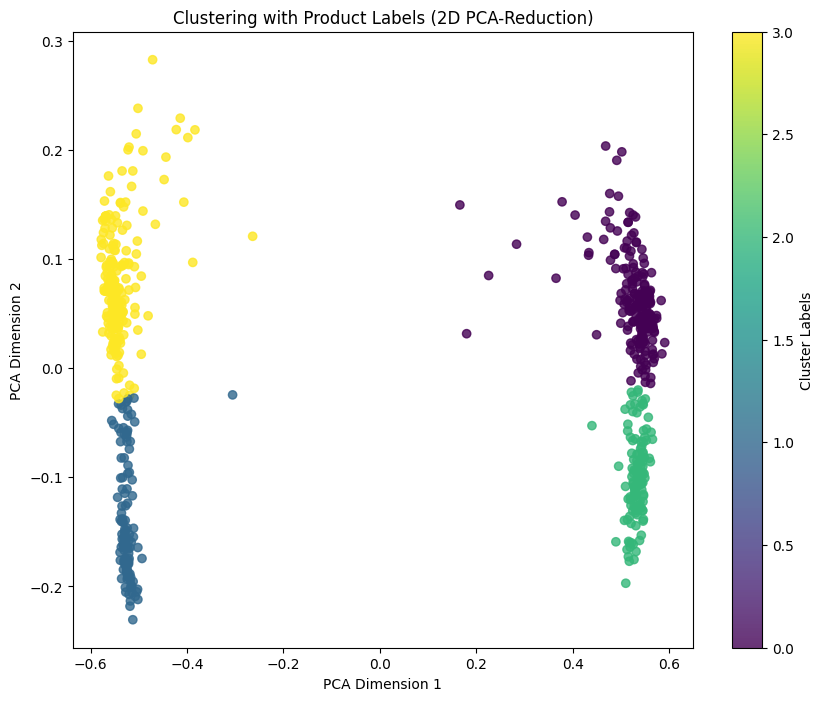

In [70]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np


pca = PCA(n_components=2)
emb_together = get_embedding(prod_1 + prod_2 + prod_1_ohne_KI + prod_2_ohne_KI + prod_1_mit_KI + prod_2_mit_KI)
prod_comb_emb_reduced = pca.fit_transform(emb_together)


num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(prod_comb_emb_reduced)


product_labels = []
for i in range(637):
    if i < 250:
        product_labels.append("Product 1")
    elif i < 500:
        product_labels.append("Product 2")
    elif i < 522:
        product_labels.append("Product 1 Mensch ohne KI")
    elif i < 544:
        product_labels.append("Product 2 Mensch ohne KI")
    elif i < 592:
        product_labels.append("Product 1 Mensch mit KI")
    else:
        product_labels.append("Product 2 Mensch mit KI")

plt.figure(figsize=(10, 8))


scatter = plt.scatter(prod_comb_emb_reduced[:, 0], prod_comb_emb_reduced[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.8)


plt.title("Clustering with Product Labels (2D PCA-Reduction)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")


#for i, label in enumerate(product_labels):
#    plt.text(prod_comb_emb_reduced[i, 0] + 0.02, prod_comb_emb_reduced[i, 1], label, fontsize=9)


plt.colorbar(scatter, label='Cluster Labels')
plt.savefig('clustering_both_kmean.pdf', format='pdf')
plt.show()


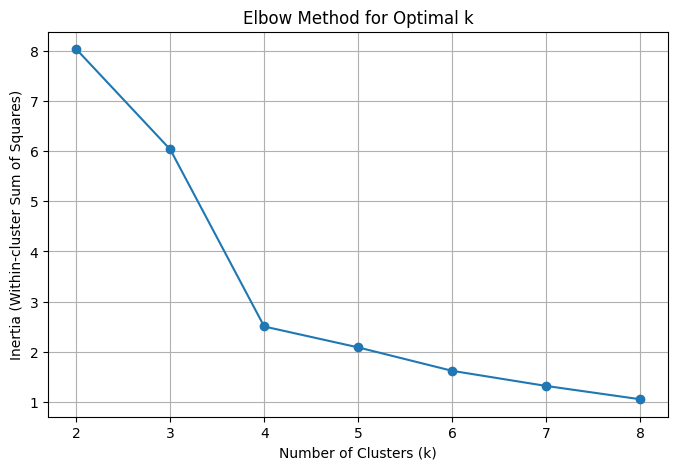

In [71]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


k_values = range(2, 9)


inertia_values = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(prod_comb_emb_reduced)
    inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('clustering_elbow_both.pdf', format='pdf')
plt.show()
